#Introduction

This notebook illustrates the Analytics Project "**Media Promotion Cost Prediction**" where we will be predicting the cost of promoting a product at a given convinience store.

##Objective

In this project we will predict the cost incurred to promote a product of a convinience store via various media options. The target variable of the Machine Learning models will be "Cost" for promoting a product.

###Problem Statement
Convenient Food Mart is a chain of convenience stores in US, Canada, and Mexico. The main objective is to use a dataset to train a few Machine Learning models and predict the **COST of promotion** for each product or item and validate the results of each ML model. We will compare the ML models to decide which one works best and then the store can use this ML model for predicting the cost of promotion for any product by providing product's and promotion and store details to the model.

This way, the store can estimate the cost for promoting each product and tally whether it is profitable to promote that item or is promoting the product resulting in losses to the store.

We will be using K-Nearest Neighbor, Decision Tree and Random Forest algorithms to predict the cost of promotion of a product. We will then compare the models and decide on the best machine learning model suited for the application.

##Dataset

This dataset is taken from the source Kaggle (source: https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart).

This dataset is a csv file containing the details of the cost it took to promote each item or product at various stores of CFM in various locations. It also has details of the product, the store, the promotion details etc which are explained in detail in the later part of this project.

###Dimentions of Dataset
Rows: 60428
Columsn: 40

#Data Processing

##Download Dataset

We have uploaded the dataset in a public Github repository. We will download the dataset .csv file from there and convert it as a dataframe.

In [0]:
%sh

# downloading the dataset from Github repository
wget https://raw.githubusercontent.com/vamsy-alapati/Media-Promotion-Cost-Prediction/main/media_promotion_cost.csv


--2022-12-12 02:46:36--  https://raw.githubusercontent.com/vamsy-alapati/Media-Promotion-Cost-Prediction/main/media_promotion_cost.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16607559 (16M) [text/plain]
Saving to: ‘media_promotion_cost.csv.1’

     0K .......... .......... .......... .......... ..........  0% 5.77M 3s
    50K .......... .......... .......... .......... ..........  0% 4.90M 3s
   100K .......... .......... .......... .......... ..........  0% 5.04M 3s
   150K .......... .......... .......... .......... ..........  1% 7.03M 3s
   200K .......... .......... .......... .......... ..........  1% 26.1M 2s
   250K .......... .......... .......... .......... ..........  1% 39.2M 2s
   300K .......... .......... .......... .......... ........

In [0]:
%sh
ls -lrt

total 33748
-r-xr-xr-x 1 root root  1307287 Jan  1  1970 preload_class.lst
-r-xr-xr-x 1 root root     3037 Jan  1  1970 hadoop_accessed_config.lst
drwxr-xr-x 2 root root     4096 Jan  1  1970 conf
drwxr-xr-x 2 root root     4096 Jan  1  1970 azure
drwxr-xr-x 3 root root     4096 Dec 11 22:07 eventlogs
-rw-r--r-- 1 root root 16607559 Dec 11 22:10 media_promotion_cost.csv
drwxr-xr-x 5 root root     4096 Dec 11 22:10 metastore_db
drwxr-xr-x 2 root root     4096 Dec 12 02:14 logs
drwxr-xr-x 2 root root     4096 Dec 12 02:45 ganglia
-rw-r--r-- 1 root root 16607559 Dec 12 02:46 media_promotion_cost.csv.1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql import DataFrame

In [0]:
%sh
pwd

/databricks/driver


In [0]:
data = spark.read.csv("file:/databricks/driver/media_promotion_cost.csv", inferSchema=True, header=True)

In [0]:
for col in data.schema.fields:
    print(col.name + " , "+str(col.dataType))

food_category , StringType()
food_department , StringType()
food_family , StringType()
store_sales(in millions) , DoubleType()
store_cost(in millions) , DoubleType()
unit_sales(in millions) , DoubleType()
promotion_name , StringType()
sales_country , StringType()
marital_status , StringType()
gender , StringType()
total_children , DoubleType()
education , StringType()
member_card , StringType()
occupation , StringType()
houseowner , StringType()
avg_cars_at home(approx)15 , DoubleType()
avg. yearly_income , StringType()
num_children_at_home , DoubleType()
avg_cars_at home(approx)18 , DoubleType()
brand_name , StringType()
SRP , DoubleType()
gross_weight , DoubleType()
net_weight , DoubleType()
recyclable_package , DoubleType()
low_fat , DoubleType()
units_per_case , DoubleType()
store_type , StringType()
store_city , StringType()
store_state , StringType()
store_sqft , DoubleType()
grocery_sqft , DoubleType()
frozen_sqft , DoubleType()
meat_sqft , DoubleType()
coffee_bar , DoubleType()

From above the list of columns displayed we can see that there is one column "avg_cars_at home(approx)"" which looks like it is duplicated. We will check if it has the same values below and decide whether to drop the duplicated column or not.

In [0]:
data.select('avg_cars_at home(approx)15', 'avg_cars_at home(approx)18').display()

avg_cars_at home(approx)15 avg_cars_at home(approx)18 1.0 1.0 4.0 4.0 1.0 1.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0 4.0 4.0 2.0 2.0 1.0 1.0 3.0 3.0 2.0 2.0 1.0 1.0 0.0 0.0 4.0 4.0 2.0 2.0 3.0 3.0 0.0 0.0 2.0 2.0 3.0 3.0 3.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 2.0 2.0 1.0 1.0 3.0 3.0 3.0 3.0 0.0 0.0 0.0 0.0 1.0 1.0 2.0 2.0 1.0 1.0 3.0 3.0 1.0 1.0 4.0 4.0 1.0 1.0 3.0 3.0 4.0 4.0 2.0 2.0 3.0 3.0 4.0 4.0 3.0 3.0 1.0 1.0 3.0 3.0 2.0 2.0 3.0 3.0 2.0 2.0 3.0 3.0 2.0 2.0 1.0 1.0 3.0 3.0 0.0 0.0 2.0 2.0 0.0 0.0 2.0 2.0 3.0 3.0 2.0 2.0 2.0 2.0 4.0 4.0 2.0 2.0 1.0 1.0 2.0 2.0 1.0 1.0 3.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 4.0 4.0 4.0 4.0 3.0 3.0 3.0 3.0 2.0 2.0 0.0 0.0 2.0 2.0 3.0 3.0 4.0 4.0 4.0 4.0 0.0 0.0 3.0 3.0 3.0 3.0 2.0 2.0 4.0 4.0 2.0 2.0 1.0 1.0 4.0 4.0 2.0 2.0 0.0 0.0 4.0 4.0 2.0 2.0 4.0 4.0 1.0 1.0 4.0 4.0 4.0 4.0 3.0 3.0 3.0 3.0 3.0 3.0 1.0 1.0 3.0 3.0 1.0 1.0 4.0 4.0 2.0 2.0 1.0 1.0 4.0 4.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0 2.0 2.0 4.0 4.0 1.0 1.0 3.0 3.0 1.0 1.0 2.0 2.0 2.0 2.0 0.0 0.0 2.0 2.0 3.0 3.0 0.0 0.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 4.0 4.0 4.0 4.0 2.0 2.0 4.0 4.0 4.0 4.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 0.0 0.0 3.0 3.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 4.0 4.0 4.0 4.0 2.0 2.0 3.0 3.0 2.0 2.0 3.0 3.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 2.0 2.0 1.0 1.0 4.0 4.0 1.0 1.0 2.0 2.0 2.0 2.0 4.0 4.0 2.0 2.0 4.0 4.0 3.0 3.0 2.0 2.0 4.0 4.0 2.0 2.0 3.0 3.0 2.0 2.0 2.0 2.0 0.0 0.0 4.0 4.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 2.0 3.0 3.0 0.0 0.0 4.0 4.0 1.0 1.0 0.0 0.0 4.0 4.0 3.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 3.0 3.0 4.0 4.0 3.0 3.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 3.0 3.0 1.0 1.0 0.0 0.0 3.0 3.0 4.0 4.0 3.0 3.0 1.0 1.0 4.0 4.0 2.0 2.0 1.0 1.0 0.0 0.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0 1.0 1.0 2.0 2.0 1.0 1.0 4.0 4.0 1.0 1.0 4.0 4.0 1.0 1.0 2.0 2.0 3.0 3.0 3.0 3.0 4.0 4.0 3.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 4.0 4.0 3.0 3.0 4.0 4.0 2.0 2.0 3.0 3.0 3.0 3.0 2.0 2.0 1.0 1.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0 3.0 3.0 2.0 2.0 3.0 3.0 3.0 3.0 2.0 2.0 4.0 4.0 2.0 2.0 1.0 1.0 1.0 1.0 4.0 4.0 2.0 2.0 2.0 2.0 4.0 4.0 3.0 3.0 2.0 2.0 2.0 2.0 3.0 3.0 1.0 1.0 2.0 2.0 3.0 3.0 3.0 3.0 1.0 1.0 1.0 1.0 4.0 4.0 4.0 4.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 4.0 4.0 3.0 3.0 1.0 1.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 2.0 3.0 3.0 4.0 4.0 2.0 2.0 1.0 1.0 3.0 3.0 2.0 2.0 3.0 3.0 3.0 3.0 4.0 4.0 3.0 3.0 3.0 3.0 1.0 1.0 3.0 3.0 4.0 4.0 4.0 4.0 4.0 4.0 3.0 3.0 2.0 2.0 0.0 0.0 1.0 1.0 3.0 3.0 3.0 3.0 1.0 1.0 3.0 3.0 0.0 0.0 0.0 0.0 4.0 4.0 2.0 2.0 0.0 0.0 3.0 3.0 2.0 2.0 3.0 3.0 1.0 1.0 1.0 1.0 2.0 2.0 0.0 0.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 2.0 2.0 3.0 3.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 4.0 4.0 4.0 4.0 2.0 2.0 4.0 4.0 2.0 2.0 3.0 3.0 2.0 2.0 1.0 1.0 3.0 3.0 1.0 1.0 1.0 1.0 3.0 3.0 0.0 0.0 1.0 1.0 3.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 1.0 1.0 2.0 2.0 3.0 3.0 3.0 3.0 1.0 1.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 4.0 4.0 3.0 3.0 1.0 1.0 3.0 3.0 2.0 2.0 2.0 2.0 3.0 3.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 4.0 4.0 4.0 4.0 2.0 2.0 2.0 2.0 1.0 1.0 3.0 3.0 2.0 2.0 3.0 3.0 0.0 0.0 1.0 1.0 2.0 2.0 2.0 2.0 1.0 1.0 3.0 3.0 2.0 2.0 2.0 2.0 4.0 4.0 3.0 3.0 0.0 0.0 2.0 2.0 1.0 1.0 3.0 3.0 2.0 2.0 4.0 4.0 3.0 3.0 2.0 2.0 4.0 4.0 3.0 3.0 3.0 3.0 1.0 1.0 1.0 1.0 3.0 3.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 0.0 0.0 1.0 1.0 1.0 1.0 3.0 3.0 3.0 3.0 4.0 4.0 4.0 4.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 4.0 4.0 2.0 2.0 1.0 1.0 4.0 4.0 4.0 4.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 4.0 4.0 4.0 4.0 1.0 1.0 4.0 4.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 0.0 0.0 3.0 3.0 3.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 0.0 0.0 2.0 2.0 1.0 1.0 4.0 4.0 3.0 3.0 3.0 3.0 2.0 2.0 3.0 3.0 4.0 4.0 0.0 0.0 1.0 1.0 3.0 3.0 0.0 0.0 1.0 1.0 3.0 3.0 1.0 1.0 4.0 4.0 0.0 0.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 1.0 1.0 2.

Here we can see that the both columns "avg_cars_at home(approx)18" and "avg_cars_at home(approx)15" have same set of values for each record.

In [0]:
data = data.withColumnRenamed("avg_cars_at home(approx)15","avg_cars_at_home")\
    .withColumnRenamed("avg_cars_at home(approx)18","avg_cars_at_home_1")
data.printSchema()

root
 |-- food_category: string (nullable = true)
 |-- food_department: string (nullable = true)
 |-- food_family: string (nullable = true)
 |-- store_sales(in millions): double (nullable = true)
 |-- store_cost(in millions): double (nullable = true)
 |-- unit_sales(in millions): double (nullable = true)
 |-- promotion_name: string (nullable = true)
 |-- sales_country: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- total_children: double (nullable = true)
 |-- education: string (nullable = true)
 |-- member_card: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- houseowner: string (nullable = true)
 |-- avg_cars_at_home: double (nullable = true)
 |-- avg. yearly_income: string (nullable = true)
 |-- num_children_at_home: double (nullable = true)
 |-- avg_cars_at_home_1: double (nullable = true)
 |-- brand_name: string (nullable = true)
 |-- SRP: double (nullable = true)
 |-- gross_weight: double (n

In [0]:
data.filter("avg_cars_at_home != avg_cars_at_home_1").display()

food_category food_department food_family store_sales(in millions) store_cost(in millions) unit_sales(in millions) promotion_name sales_country marital_status gender total_children education member_card occupation houseowner avg_cars_at_home avg. yearly_income num_children_at_home avg_cars_at_home_1 brand_name SRP gross_weight net_weight recyclable_package low_fat units_per_case store_type store_city store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar video_store salad_bar prepared_food florist media_type cost

We can see above after running the query to fetch any results where the data of both columns do not match. But this returned no results which concludes that the two columns have same values for each record and that they are duplicated columns.

Hence, we can now drop the duplicated column **avg_cars_at_home_1** from the dataframe.

In [0]:
data = data.drop('avg_cars_at_home_1')
data.printSchema()

root
 |-- food_category: string (nullable = true)
 |-- food_department: string (nullable = true)
 |-- food_family: string (nullable = true)
 |-- store_sales(in millions): double (nullable = true)
 |-- store_cost(in millions): double (nullable = true)
 |-- unit_sales(in millions): double (nullable = true)
 |-- promotion_name: string (nullable = true)
 |-- sales_country: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- total_children: double (nullable = true)
 |-- education: string (nullable = true)
 |-- member_card: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- houseowner: string (nullable = true)
 |-- avg_cars_at_home: double (nullable = true)
 |-- avg. yearly_income: string (nullable = true)
 |-- num_children_at_home: double (nullable = true)
 |-- brand_name: string (nullable = true)
 |-- SRP: double (nullable = true)
 |-- gross_weight: double (nullable = true)
 |-- net_weight: double (nullable 

In [0]:
data.columns

Out[139]: ['food_category',
 'food_department',
 'food_family',
 'store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'total_children',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg_cars_at_home',
 'avg. yearly_income',
 'num_children_at_home',
 'brand_name',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_type',
 'store_city',
 'store_state',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'media_type',
 'cost']

##Data Features Explained

This dataset has various features which can be categorized into multiple labels such as, item details, store details, promotion details, customer details

After Categorizing each column into these labels this is how the distribution looks like:

**ITEM:**
1.  *food_category* - type of the food
2.  *food_department* - department of food the item belongs to
3.  *food_family* - family of food the item belongs to
4.  *brand_name* - brand name of item
5.  *SRP* - Suggested Retail Price
6.  *gross_weight* - gross weight of item
7.  *net_weight* - net weight of item
8.  *recyclable_package* - item package is recyclable or not
9.  *low_fat* - is the item low fat content
10. *units_per_case* - number of units of item present a case
11. *cost* - cost of the item

**STORE:**
1.  *store_sales(in millions)* -  sales of the store (in millions of dollars)
2.  *store_cost(in millions)* - cost of the store (in millions of dollars)
3.  *sales_country* - country the store is present in
4.  *store_city* - city the store present in
5.  *store_state* - state the store is present in
6.  *store_type* - type of the store
7.  *store_sqft* - area of the store (in sqft)
8.  *grocery_sqft* - area of the grocery section of store (in sqft)
9.  *frozen_sqft* - area of the frozen food section of store (in sqft)
10. *meat_sqft* - area of the meat section of store (in sqft)
11. *coffee_bar* - whether the store has coffee bar station
12. *video_store* - whether the store has video/gaming section
13. *salad_bar* - whether store has salab bar section
14. *unit_sales(in millions)* - number of units the store has sold (in millions)
15. *prepared_food* - if the store has prepared food section
16. *florist* - if the store has flower section

**PROMOTION:**
1.  *promotion_name* - name of the promotion
2.  *media_type* - type of medias used in the promotion

**CUSTOMER:**
1.  *gender* - male of female customer
2.  *marital_status* - marital status of customer
3.  *total_children* - number of children the customer has
4.  *education* - education level of the customer
5.  *member_card* - kind of membership the customer holds
6.  *occupation* - occupation of the customer
7.  *house_owner* - if the customer owns a house or not
8.  *avg_cars_at_home* - average of number of cars the customer has at home
9.  *avg. yearly_income* - average yearly income of the customer
10. *num_children_at_home* - number of children does the customer currently have at home

##Data Quality Check

In [0]:
# Define functions that will check for nan columns, null columns and empty strings from the dataframe

def nan_col_count(df):
    return(df.select([F.count(F.when(F.isnan(df[c]), c)) \
                      .alias(c) for c in df.columns]))

def nan_col_count(df):
    return(df.select([F.count(F.when(F.isnan(df[c].cast(T.DoubleType())), c)) \
                      .alias(c) for c in df.columns]))    

def null_col_count(df):
    return(df.select([F.count(F.when(df[c].isNull(), c))\
                      .alias(c) for c in df.columns]))

def ept_string_col_count(df):
    cols = [c[0] for c in df.dtypes if  c[1] == 'string']
    df = df.select(*cols)
    return(df.select([F.count(F.when(F.col(c) == "", c))\
                      .alias(c) for c in df.columns]))

In [0]:
# define a function that will drop columns that are null
def drop_null_cols(df):
    nrows = df.count()
    cols = [col for col in df.columns if df.where(F.col(col).isNull()).count() == nrows]
    df = df.drop(*cols)
    return df

In [0]:
data = data.withColumnRenamed("avg. yearly_income","avg_yearly_income")

In [0]:
print("NaN values in the dataframe, column wise")
display(nan_col_count(data))

NaN values in the dataframe, column wise


food_category food_department food_family store_sales(in millions) store_cost(in millions) unit_sales(in millions) promotion_name sales_country marital_status gender total_children education member_card occupation houseowner avg_cars_at_home avg_yearly_income num_children_at_home brand_name SRP gross_weight net_weight recyclable_package low_fat units_per_case store_type store_city store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar video_store salad_bar prepared_food florist media_type cost 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [0]:
print("Null values in the dataframe, column wise")
display(null_col_count(data))

Null values in the dataframe, column wise


food_category food_department food_family store_sales(in millions) store_cost(in millions) unit_sales(in millions) promotion_name sales_country marital_status gender total_children education member_card occupation houseowner avg_cars_at_home avg_yearly_income num_children_at_home brand_name SRP gross_weight net_weight recyclable_package low_fat units_per_case store_type store_city store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar video_store salad_bar prepared_food florist media_type cost 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [0]:
print("Empty strings in the dataframe, column wise")
display(ept_string_col_count(data))

Empty strings in the dataframe, column wise


food_category food_department food_family promotion_name sales_country marital_status gender education member_card occupation houseowner avg_yearly_income brand_name store_type store_city store_state media_type 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

As we can see above, there are no NaN values or Null values or Empty string values in any of the columns in the data frame. Hence we don't need to handle either of them for this data.

##Exploratory Data Analysis

Now, we analyse the data and try to derive some results based on the analysis and understand what the data has to say before we jump into any machine learning models.

In [0]:
print("Dimensions of the data:")
print(data.count(), len(data.columns))

Dimensions of the data:
60428 39


In [0]:
#display the whole data frame
display(data)

food_category food_department food_family store_sales(in millions) store_cost(in millions) unit_sales(in millions) promotion_name sales_country marital_status gender total_children education member_card occupation houseowner avg_cars_at_home avg_yearly_income num_children_at_home brand_name SRP gross_weight net_weight recyclable_package low_fat units_per_case store_type store_city store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar video_store salad_bar prepared_food florist media_type cost Breakfast Foods Frozen Foods Food 7.36 2.7232 4.0 Bag Stuffers USA M F 1.0 Partial High School Normal Skilled Manual Y 1.0 $10K - $30K 1.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 126.62 Breakfast Foods Frozen Foods Food 5.52 2.5944 3.0 Cash Register Lottery USA M M 0.0 Bachelors Degree Silver Professional Y 4.0 $50K - $70K 0.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 Breakfast Foods Frozen Foods Food 3.68 1.3616 2.0 High Roller Savings USA S F 4.0 Partial High School Normal Manual N 1.0 $10K - $30K 0.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 84.16 Breakfast Foods Frozen Foods Food 3.68 1.1776 2.0 Cash Register Lottery USA M F 2.0 High School Degree Bronze Manual Y 2.0 $30K - $50K 2.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 In-Store Coupon 95.78 Breakfast Foods Frozen Foods Food 4.08 1.428 3.0 Double Down Sale USA M M 0.0 Partial High School Bronze Skilled Manual N 2.0 $30K - $50K 0.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Radio 50.79 Breakfast Foods Frozen Foods Food 4.08 1.4688 3.0 Double Down Sale USA M F 2.0 Bachelors Degree Bronze Professional N 1.0 $50K - $70K 2.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Radio 50.79 Breakfast Foods Frozen Foods Food 5.44 2.5568 4.0 Cash Register Lottery USA S F 4.0 High School Degree Bronze Skilled Manual N 2.0 $30K - $50K 0.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 In-Store Coupon 95.78 Breakfast Foods Frozen Foods Food 3.74 1.6082 2.0 Cash Register Lottery USA S M 1.0 Partial High School Bronze Manual Y 4.0 $50K - $70K 0.0 Imagine 1.87 16.7 14.7 1.0 1.0 10.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 Breakfast Foods Frozen Foods Food 4.08 1.4688 3.0 Cash Register Lottery USA S F 2.0 Partial High School Normal Skilled Manual N 2.0 $10K - $30K 0.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 Breakfast Foods Frozen Foods Food 9.72 4.5684 3.0 High Roller Savings USA S F 3.0 Graduate Degree Bronze Professional N 1.0 $70K - $90K 0.0 Big Time 3.24 16.3 14.2 1.0 0.0 25.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 84.16 Breakfast Foods Frozen Foods Food 9.72 4.0824 3.0 Green Light Days USA S M 2.0 Graduate Degree Bronze Professional N 3.0 $70K - $90K 0.0 Big Time 3.24 16.3 14.2 1.0 0.0 25.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper 66.27 Breakfast Foods Frozen Foods Food 3.28 1.5416 2.0 Bag Stuffers USA S M 1.0 Bachelors Degree Bronze Professional N 2.0 $110K - $130K 0.0 PigTail 1.64 14.1 13.1 0.0 1.0 25.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Product Attachment 82.62 Breakfast Foods Frozen Foods Food 4.08 1.3464 3.0 Big Time Savings USA S F 4.0 High School Degree Bronze Skilled Manual N 1.0 $30K - $50K 0.0 Golden 1.36 7.12 5

In [0]:
#display the summary of the columns in dataframe
display(data.summary())

summary food_category food_department food_family store_sales(in millions) store_cost(in millions) unit_sales(in millions) promotion_name sales_country marital_status gender total_children education member_card occupation houseowner avg_cars_at_home avg_yearly_income num_children_at_home brand_name SRP gross_weight net_weight recyclable_package low_fat units_per_case store_type store_city store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar video_store salad_bar prepared_food florist media_type cost count 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 60428 mean null null null 6.541030648043992 2.6194595005626704 3.0931687297279407 null null null null 2.5338750248229296 null null null null 2.2002713973654595 null 0.8293506321572781 null 2.115258489442008 13.806433110478375 11.796289137486553 0.5586648573508969 0.3504335738399417 18.860693718143906 null null null 27988.47749387701 19133.799695505393 5312.85255179718 3541.846279870259 0.6126464552856292 0.35415701330509036 0.5879559144767327 0.5879559144767327 0.5626034288740319 null 99.26236612166574 stddev null null null 3.463046547448733 1.453008709180552 0.8276769105902902 null null null null 1.4901647863494507 null null null null 1.109643685749335 null 1.3034238727901362 null 0.9328285609406944 4.622692755103317 4.682986188514637 0.49655061653503546 0.47710968465172154 10.258554736643594 null null null 5701.0220901372095 3987.3957345072777 1575.9072627117118 1050.4716351625248 0.48714956978569934 0.4782610254426353 0.4922070360181039 0.4922070360181039 0.49606943370700923 null 30.011257185233834 min Baking Goods Alcoholic Beverages Drink 0.51 0.1632 1.0 Bag Stuffers Canada M F 0.0 Bachelors Degree Bronze Clerical N 0.0 $10K - $30K 0.0 ADJ 0.5 6.0 3.05 0.0 0.0 1.0 Deluxe Supermarket Acapulco BC 20319.0 13305.0 2452.0 1635.0 0.0 0.0 0.0 0.0 0.0 Bulk Mail 50.79 25% null null null 3.81 1.5 3.0 null null null null 1.0 null null null null 1.0 null 0.0 null 1.41 9.7 7.71 0.0 0.0 10.0 null null null 23593.0 16232.0 4746.0 3164.0 0.0 0.0 0.0 0.0 0.0 null 69.65 50% null null null 5.94 2.385 3.0 null null null null 3.0 null null null null 2.0 null 0.0 null 2.13 13.6 11.6 1.0 0.0 19.0 null null null 27694.0 18670.0 5062.0 3375.0 1.0 0.0 1.0 1.0 1.0 null 98.52 75% null null null 8.67 3.483 4.0 null null null null 4.0 null null null null 3.0 null 1.0 null 2.79 17.7 16.0 1.0 1.0 28.0 null null null 30797.0 22123.0 5751.0 3834.0 1.0 1.0 1.0 1.0 1.0 null 126.62 max Vegetables Starchy Foods Non-Consumable 22.92 9.7265 6.0 You Save Days USA S M 5.0 Partial High School Silver Skilled Manual Y 4.0 $90K - $110K 5.0 Washington 3.98 21.9 20.8 1.0 1.0 36.0 Supermarket Victoria Zacatecas 39696.0 30351.0 9184.0 6122.0 1.0 1.0 1.0 1.0 1.0 TV 149.75

####Correlation Matrix

We will now find the correlation between the fields of the dataframe with each other. We will display the correlation matrix and the heatmap of the same.

Before calculating the correlation values for the dataframe, we need to encode all the non-numeric columns in the dataframe.

So we first identify all the non-numeric columns.

In [0]:
from pyspark.sql.types import StringType, LongType, DoubleType
dt = data.dtypes

nonNumericCols = [field.name for field in data.schema.fields if isinstance(
    field.dataType, StringType)]

print("Non-numeric columns: ", nonNumericCols)

print("Number of non-numeric columns: ", len(nonNumericCols))

Non-numeric columns:  ['food_category', 'food_department', 'food_family', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg_yearly_income', 'brand_name', 'store_type', 'store_city', 'store_state', 'media_type']
Number of non-numeric columns:  17


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

In [0]:
stages = []

#iterate through all categorical values
for categoricalCol in nonNumericCols:
    #create a string indexer for those categorical values and assign a new name including the word 'Index'
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + '_index')

    #append the string Indexer to our list of stages
    stages += [stringIndexer]

#Create the pipeline. Assign the satges list to the pipeline key word stages
pipeline = Pipeline(stages = stages)
#fit the pipeline to our dataframe
pipelineModel = pipeline.fit(data)
#transform the dataframe
encoded_df = pipelineModel.transform(data)


In [0]:
data.display(10)
encoded_df.display()
len(encoded_df.columns)

food_category food_department food_family store_sales(in millions) store_cost(in millions) unit_sales(in millions) promotion_name sales_country marital_status gender total_children education member_card occupation houseowner avg_cars_at_home avg_yearly_income num_children_at_home brand_name SRP gross_weight net_weight recyclable_package low_fat units_per_case store_type store_city store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar video_store salad_bar prepared_food florist media_type cost Breakfast Foods Frozen Foods Food 7.36 2.7232 4.0 Bag Stuffers USA M F 1.0 Partial High School Normal Skilled Manual Y 1.0 $10K - $30K 1.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 126.62 Breakfast Foods Frozen Foods Food 5.52 2.5944 3.0 Cash Register Lottery USA M M 0.0 Bachelors Degree Silver Professional Y 4.0 $50K - $70K 0.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 Breakfast Foods Frozen Foods Food 3.68 1.3616 2.0 High Roller Savings USA S F 4.0 Partial High School Normal Manual N 1.0 $10K - $30K 0.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 84.16 Breakfast Foods Frozen Foods Food 3.68 1.1776 2.0 Cash Register Lottery USA M F 2.0 High School Degree Bronze Manual Y 2.0 $30K - $50K 2.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 In-Store Coupon 95.78 Breakfast Foods Frozen Foods Food 4.08 1.428 3.0 Double Down Sale USA M M 0.0 Partial High School Bronze Skilled Manual N 2.0 $30K - $50K 0.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Radio 50.79 Breakfast Foods Frozen Foods Food 4.08 1.4688 3.0 Double Down Sale USA M F 2.0 Bachelors Degree Bronze Professional N 1.0 $50K - $70K 2.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Radio 50.79 Breakfast Foods Frozen Foods Food 5.44 2.5568 4.0 Cash Register Lottery USA S F 4.0 High School Degree Bronze Skilled Manual N 2.0 $30K - $50K 0.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 In-Store Coupon 95.78 Breakfast Foods Frozen Foods Food 3.74 1.6082 2.0 Cash Register Lottery USA S M 1.0 Partial High School Bronze Manual Y 4.0 $50K - $70K 0.0 Imagine 1.87 16.7 14.7 1.0 1.0 10.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 Breakfast Foods Frozen Foods Food 4.08 1.4688 3.0 Cash Register Lottery USA S F 2.0 Partial High School Normal Skilled Manual N 2.0 $10K - $30K 0.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 Breakfast Foods Frozen Foods Food 9.72 4.5684 3.0 High Roller Savings USA S F 3.0 Graduate Degree Bronze Professional N 1.0 $70K - $90K 0.0 Big Time 3.24 16.3 14.2 1.0 0.0 25.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 84.16 Breakfast Foods Frozen Foods Food 9.72 4.0824 3.0 Green Light Days USA S M 2.0 Graduate Degree Bronze Professional N 3.0 $70K - $90K 0.0 Big Time 3.24 16.3 14.2 1.0 0.0 25.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper 66.27 Breakfast Foods Frozen Foods Food 3.28 1.5416 2.0 Bag Stuffers USA S M 1.0 Bachelors Degree Bronze Professional N 2.0 $110K - $130K 0.0 PigTail 1.64 14.1 13.1 0.0 1.0 25.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Product Attachment 82.62 Breakfast Foods Frozen Foods Food 4.08 1.3464 3.0 Big Time Savings USA S F 4.0 High School Degree Bronze Skilled Manual N 1.0 $30K - $50K 0.0 Golden 1.36 7.12 5

food_category food_department food_family store_sales(in millions) store_cost(in millions) unit_sales(in millions) promotion_name sales_country marital_status gender total_children education member_card occupation houseowner avg_cars_at_home avg_yearly_income num_children_at_home brand_name SRP gross_weight net_weight recyclable_package low_fat units_per_case store_type store_city store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar video_store salad_bar prepared_food florist media_type cost food_category_index food_department_index food_family_index promotion_name_index sales_country_index marital_status_index gender_index education_index member_card_index occupation_index houseowner_index avg_yearly_income_index brand_name_index store_type_index store_city_index store_state_index media_type_index Breakfast Foods Frozen Foods Food 7.36 2.7232 4.0 Bag Stuffers USA M F 1.0 Partial High School Normal Skilled Manual Y 1.0 $10K - $30K 1.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 126.62 7.0 3.0 0.0 30.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 12.0 1.0 1.0 1.0 0.0 Breakfast Foods Frozen Foods Food 5.52 2.5944 3.0 Cash Register Lottery USA M M 0.0 Bachelors Degree Silver Professional Y 4.0 $50K - $70K 0.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 7.0 3.0 0.0 14.0 0.0 1.0 1.0 2.0 3.0 0.0 0.0 2.0 12.0 1.0 1.0 1.0 0.0 Breakfast Foods Frozen Foods Food 3.68 1.3616 2.0 High Roller Savings USA S F 4.0 Partial High School Normal Manual N 1.0 $10K - $30K 0.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 84.16 7.0 3.0 0.0 9.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 1.0 12.0 1.0 1.0 1.0 0.0 Breakfast Foods Frozen Foods Food 3.68 1.1776 2.0 Cash Register Lottery USA M F 2.0 High School Degree Bronze Manual Y 2.0 $30K - $50K 2.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 In-Store Coupon 95.78 7.0 3.0 0.0 14.0 0.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 12.0 1.0 1.0 1.0 7.0 Breakfast Foods Frozen Foods Food 4.08 1.428 3.0 Double Down Sale USA M M 0.0 Partial High School Bronze Skilled Manual N 2.0 $30K - $50K 0.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Radio 50.79 7.0 3.0 0.0 8.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 16.0 1.0 1.0 1.0 5.0 Breakfast Foods Frozen Foods Food 4.08 1.4688 3.0 Double Down Sale USA M F 2.0 Bachelors Degree Bronze Professional N 1.0 $50K - $70K 2.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Radio 50.79 7.0 3.0 0.0 8.0 0.0 1.0 0.0 2.0 0.0 0.0 1.0 2.0 16.0 1.0 1.0 1.0 5.0 Breakfast Foods Frozen Foods Food 5.44 2.5568 4.0 Cash Register Lottery USA S F 4.0 High School Degree Bronze Skilled Manual N 2.0 $30K - $50K 0.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 In-Store Coupon 95.78 7.0 3.0 0.0 14.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 16.0 1.0 1.0 1.0 7.0 Breakfast Foods Frozen Foods Food 3.74 1.6082 2.0 Cash Register Lottery USA S M 1.0 Partial High School Bronze Manual Y 4.0 $50K - $70K 0.0 Imagine 1.87 16.7 14.7 1.0 1.0 10.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 7.0 3.0 0.0 14.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 2.0 20.0 1.0 1.0 1.0 0.0 Breakfast Foods Frozen Foods Food 4.08 1.4688 3.0 Cash Register Lottery USA S F 2.0 Partial High School Normal Skilled Manual N 2.0 $10K - $30K 0.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 7.0 3.0 0.0 14.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 16.0 1.0 1.0 1.0 0.0 Breakfast Foods Frozen Foods Food 9.72 4.5684

Out[152]: 56

In [0]:
encoded_df = encoded_df.drop(*nonNumericCols)
len(encoded_df.columns)

Out[153]: 39

In [0]:
#basic imports

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

In [0]:
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=encoded_df.columns, 
                            outputCol=vector_col)
myGraph_vector = assembler.transform(encoded_df).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)

[[1.0, 0.9546847731479704, 0.5034818282068806, 0.08331336125071598, 0.0044976373070770995, 0.03243731892286406, 0.8334781323696017, 0.03617856095788279, 0.03201370972135029, 0.03429307016545146, -0.006133821525087543, -0.010630043340679178, 0.015543468788040294, 0.010442020889422988, 0.017886310556418462, 0.01788307841313165, -0.029367833793045722, 0.01917907587304462, 0.031459441149719755, 0.031459441149719755, 0.030603264633037832, -0.0046209666165485195, -0.02295382902283921, -0.025301914138378047, -0.02771605730138565, -0.01502845068640761, 0.010322369947573379, 0.007519847914182501, 0.0001329841883795237, -0.0102968064030385, 0.006157105698443389, 0.0007667456626010151, -0.005723775233691173, -0.0039482829315511505, -0.019991539753907047, -0.09810087049533, -0.06892588876329134, -0.009766338969721913, -0.0055348134371675335], [0.9546847731479704, 1.0, 0.480087316789327, 0.07905820537403165, 0.0028649747575864256, 0.02757628691232497, 0.7958797742604363, 0.034237250833302785, 0.030

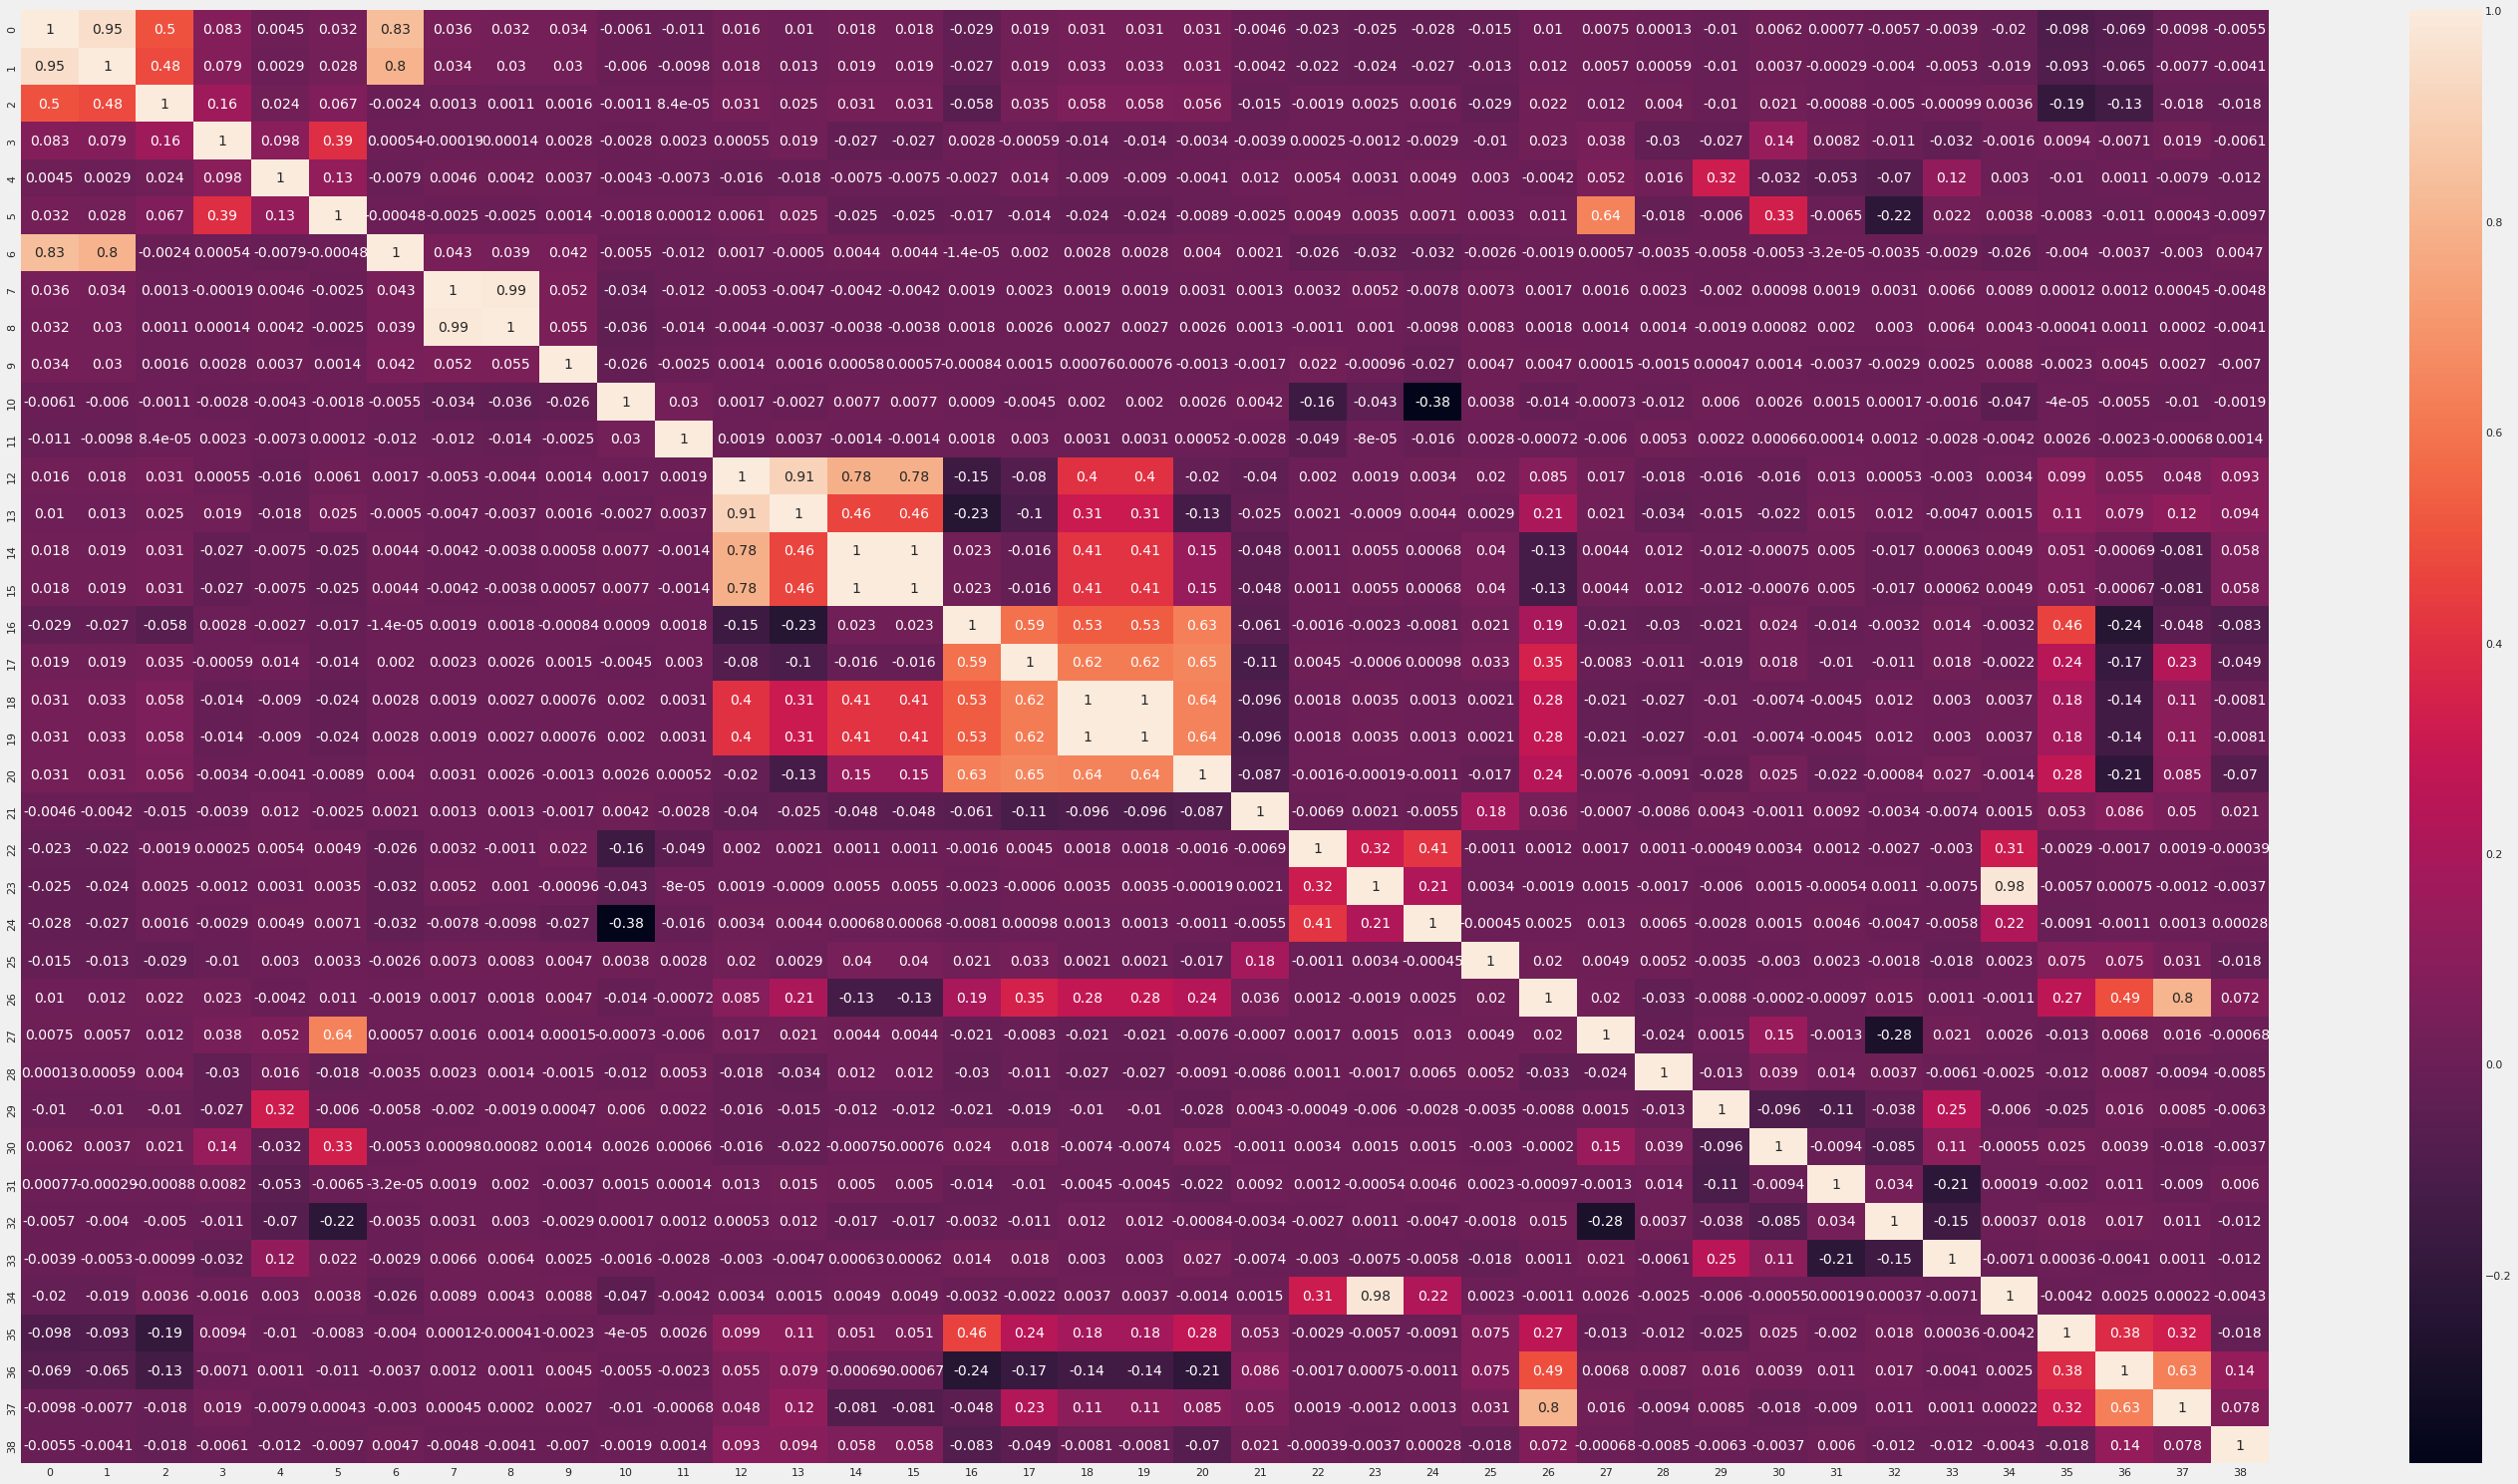

In [0]:
# Need to get column names for the heatmap
plt.figure(figsize=(45,25))
sns.heatmap(corrmatrix, annot = True)
plt.show()

In [0]:
encoded_df.columns

Out[157]: ['store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'avg_cars_at_home',
 'num_children_at_home',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost',
 'food_category_index',
 'food_department_index',
 'food_family_index',
 'promotion_name_index',
 'sales_country_index',
 'marital_status_index',
 'gender_index',
 'education_index',
 'member_card_index',
 'occupation_index',
 'houseowner_index',
 'avg_yearly_income_index',
 'brand_name_index',
 'store_type_index',
 'store_city_index',
 'store_state_index',
 'media_type_index']

####Explaning the Heatmap

We are considering 0.8 as the threshold value for correlation between columns in the dataframe. Hence, from the heat map shown above, we can see that there are a few columns which are highly correlated to each other and these can influence the model in negative way. Below are more details on the same.


| Highly correlated features | Correlation | Retained feature | Redundant feature |
| ----------- | ----------- | ------------| ------------|
| <li>prepared_food</li><li>salad_bar</li> | 1 | <li> prepared_food </li> | <li> salad_bar </li>
| <li>frozen_sqft</li><li>meat_sqft</li> | 1 | <li> frozen_sqft </li> | <li> meat_sqft </li>
| <li>net_weight</li><li>gross_weight</li> | 0.99 | <li> net_weight </li> | <li> gross_weight </li>
| <li>grocery_sqft</li><li>store_sqft</li> | 0.91 | <li> grocery_sqft </li> | <li> store_sqft </li>

Here, from the above table illustrates the correlation values between a pair of columns. Since the correlation value exceeds the threshold value of 0.8 we will retain one column as mentioned in retained column and eliminate the other redundant one.


| Highly correlated features | Correlation | Retained feature | Redundant feature |
| ----------- | ----------- | ------------| ------------|
| <li>store_sales</li><li>store_cost</li> | 0.95 | SRP | store_cost
| <li>SRP</li><li>store_sales</li> | 0.83 |  | store_sales
| <li>SRP</li><li>store_cost</li> | 0.80 |  | 

The 3 features 'store_sales', 'store_cost', 'SRP' all are inter correlated with each other. Hence we can just select one of these 3 features and drop the remaning 2 features as mentioned in the redundant column in the above table. We will retain the SRP feature in the dataframe for modelling.

In [0]:
redundant_cols = ['salad_bar', 'gross_weight', 'meat_sqft', 'store_sqft',
                          'store_sales(in millions)', 'store_cost(in millions)']

data = data.drop(*redundant_cols)
encoded_df = encoded_df.drop(*redundant_cols)

print(encoded_df.columns)

['unit_sales(in millions)', 'total_children', 'avg_cars_at_home', 'num_children_at_home', 'SRP', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'grocery_sqft', 'frozen_sqft', 'coffee_bar', 'video_store', 'prepared_food', 'florist', 'cost', 'food_category_index', 'food_department_index', 'food_family_index', 'promotion_name_index', 'sales_country_index', 'marital_status_index', 'gender_index', 'education_index', 'member_card_index', 'occupation_index', 'houseowner_index', 'avg_yearly_income_index', 'brand_name_index', 'store_type_index', 'store_city_index', 'store_state_index', 'media_type_index']


####Visualizations - Analyzing the columnar data

#####Numeric Columns

In [0]:
# numeric cols
numericCols = [field.name for field in data.schema.fields if not isinstance(
    field.dataType, StringType)]

#we know from looking at the dataset that the columns 'recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'prepared_food', 'florist' are categorical columns with values 1 and 0 for yes and no
catCols2 = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'prepared_food', 'florist']

print("Number of numeric Columns: ", len(numericCols))
print("Numeric Cols: ",numericCols)

Number of numeric Columns:  16
Numeric Cols:  ['unit_sales(in millions)', 'total_children', 'avg_cars_at_home', 'num_children_at_home', 'SRP', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'grocery_sqft', 'frozen_sqft', 'coffee_bar', 'video_store', 'prepared_food', 'florist', 'cost']


In [0]:
import pandas as pd
import pyspark.sql as sparksql

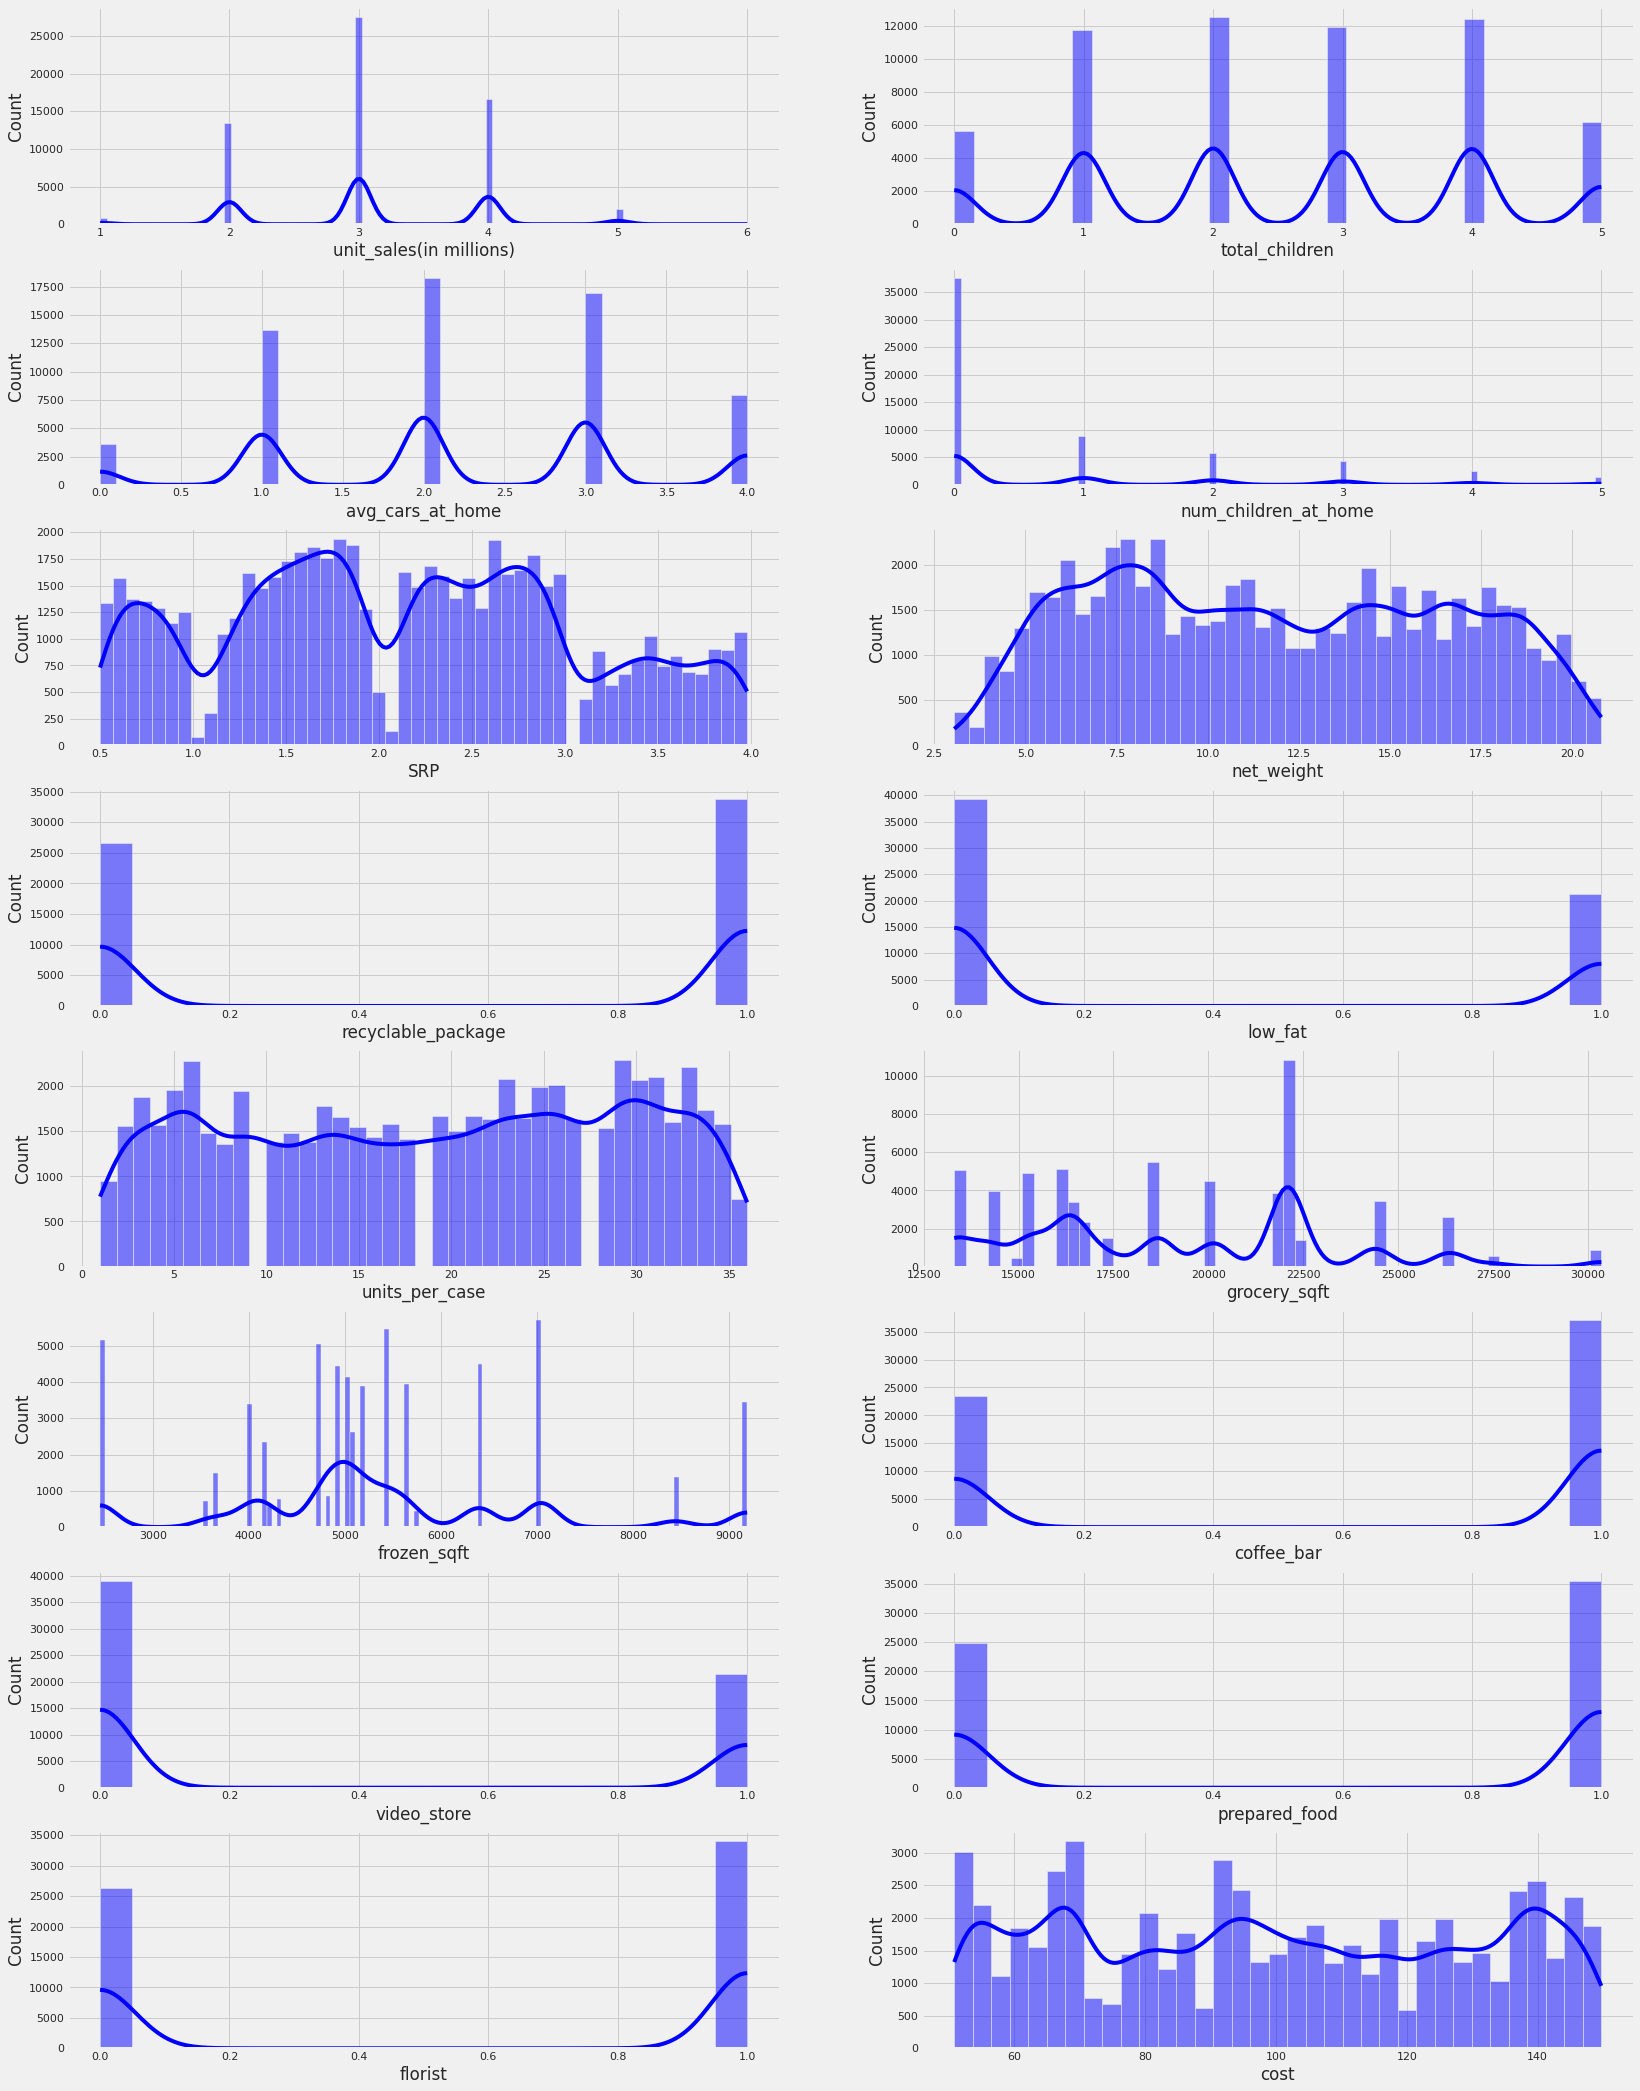

In [0]:
pdf = encoded_df.toPandas()
rows, columns = 8, 2
cnt = 0
fix, axis = plt.subplots(rows, columns, figsize=(25,35))
for r in range(rows):
    for c in range(columns):
        #tdf = encoded_df.select(numericCols[cnt]).groupBy(numericCols[cnt]).count()
        #display(tdf)
        #tdf = tdf.toPandas()
        #display(tdf)
        sns.histplot(ax=axis[r,c], data=pdf, x=numericCols[cnt], kde=True, color = 'blue')
        #sns.barplot(data=tdf, x=numericCols[cnt], y='count')
        #print(numericCols[cnt])
        cnt += 1

From the above plots we can see the freequency of each distinct value of each numeric column. There are various changes in the frequencies for each feature. However, we can see that there are 6 features which only have 2 distinct values and those are 0 and 1. 

These are the features as said above, 'recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'prepared_food', 'florist'. There features can therefore be considered as binary features and now let us see how they affect our target variable "Cost".

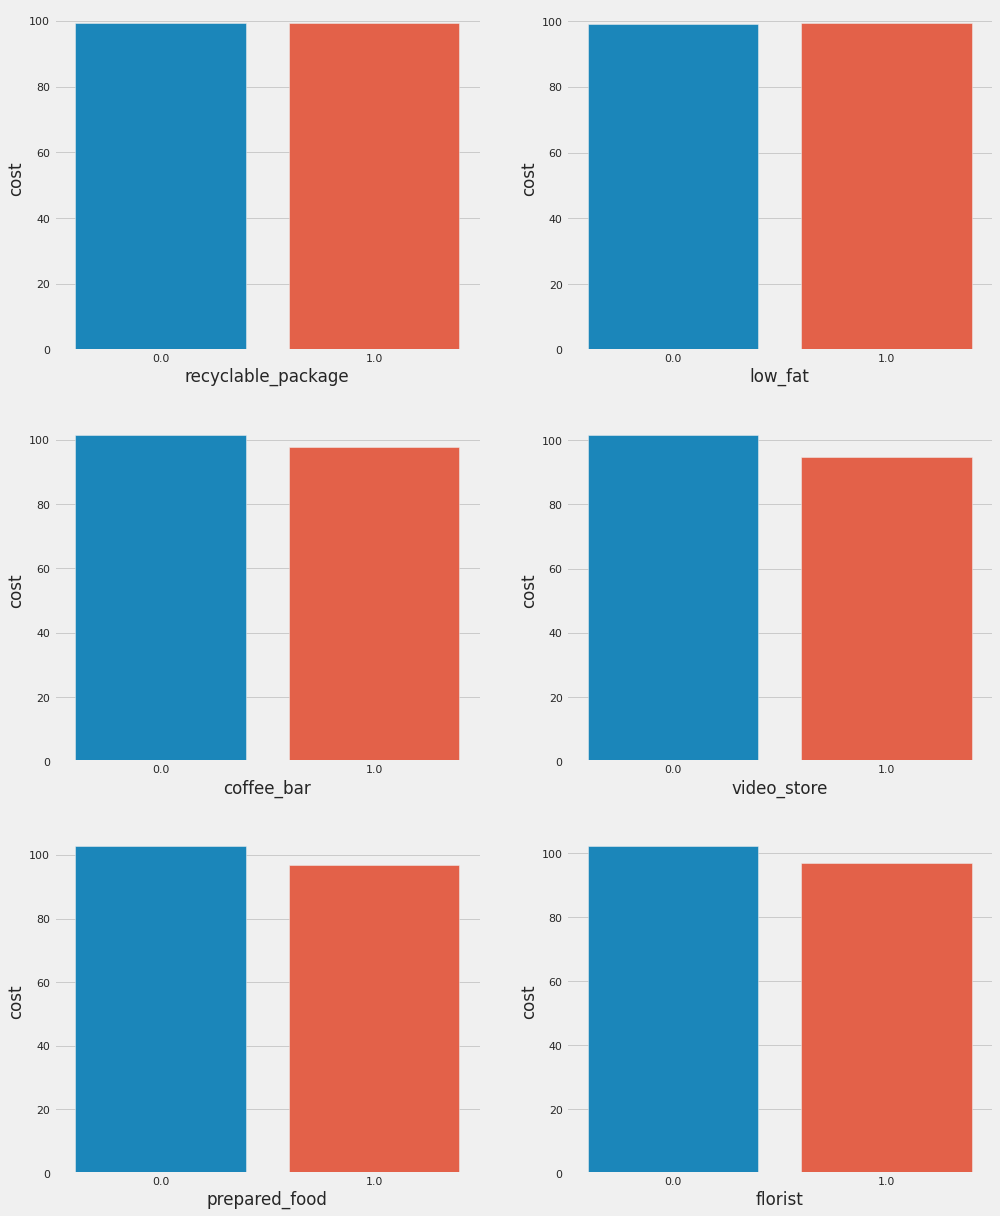

In [0]:
#load these cols into a list
cols2 = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'prepared_food', 'florist']

#plotting the mean of cost for all the observations for each binary value of each column
rows, columns = 3, 2
cnt = 0
fix, axis = plt.subplots(rows, columns, figsize=(15,20))
for r in range(rows):
    for c in range(columns):
        sns.barplot(ax=axis[r,c], data=pdf.groupby(cols2[cnt])['cost'].mean().reset_index(), x=cols2[cnt], y='cost')
        cnt += 1

From the above bar plots of the mean of cost against each binary value of each column, we can conclude that for the features 'recyclable_package', 'low_fat' the mean of target variable "Cost" value is almost same (very minute difference) which means that whether the answer for these two questions recyclable_package and low_fat is Yes or No has not much affect on the cost of promoting the product.

Hence, these features can be removed from the ML modeling of the dataset as we can classify them redundant features. So, we will drop these two columns.

In [0]:
redundant_cols = []
redundant_cols = ['recyclable_package','low_fat']

data = data.drop(*redundant_cols)
encoded_df = encoded_df.drop(*redundant_cols)

print(len(data.columns))
print(len(encoded_df.columns))

31
31


In [0]:
pdf = pdf.drop(columns=redundant_cols)
print(len(pdf.columns))

31


#####Non-Numeric columns

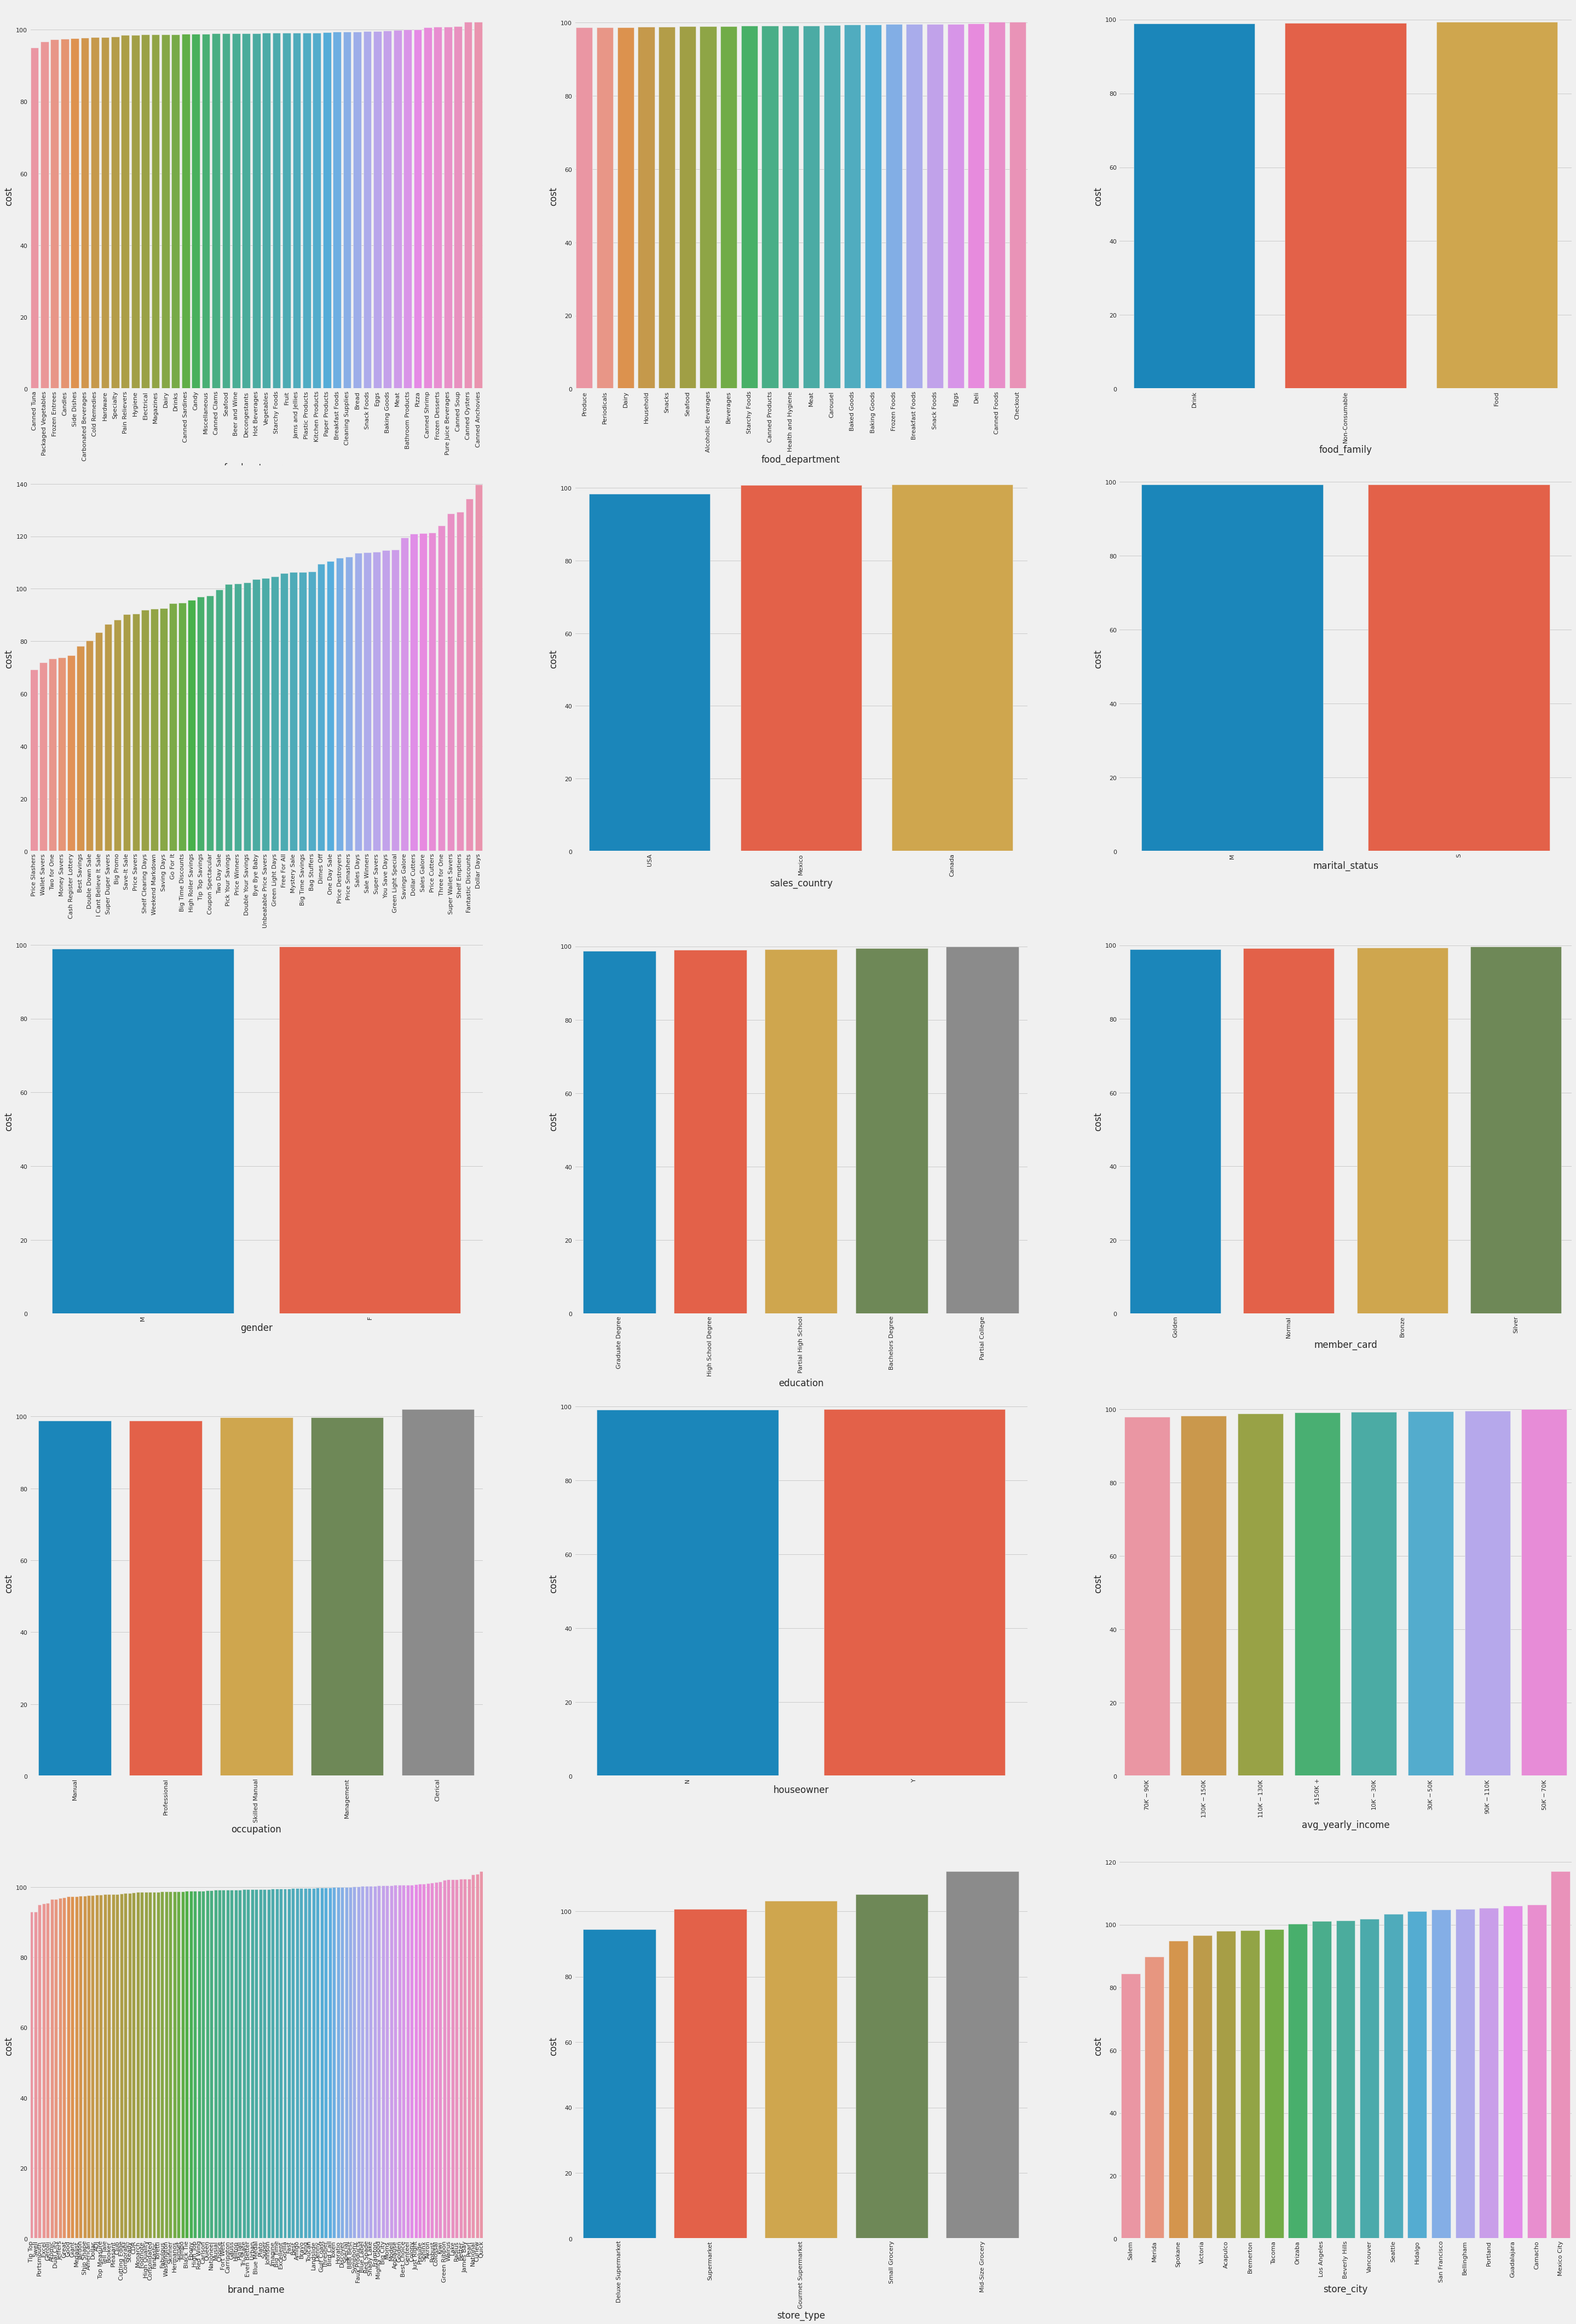

In [0]:
pdf2 = data.toPandas()
rows, columns = 5,3 #visualizing 16 of the features
cnt = 0
fix, axis = plt.subplots(rows, columns, figsize=(45,70))
for r in range(rows):
    for c in range(columns):
        sns.barplot(ax=axis[r,c], data=pdf2.groupby(nonNumericCols[cnt])['cost'].mean().sort_values().reset_index(), x=nonNumericCols[cnt],y='cost')
        axis[r,c].tick_params(axis='x',rotation=90)
        cnt += 1

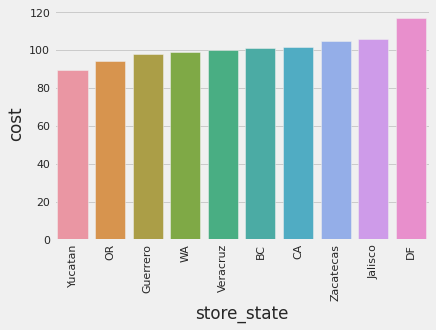

In [0]:
# plotting the last second non-numeric column
pl1 = sns.barplot(data=pdf2.groupby(nonNumericCols[-2])['cost'].mean().sort_values().reset_index(), x=nonNumericCols[-2],y='cost')
pl1.tick_params(axis='x',rotation=90)


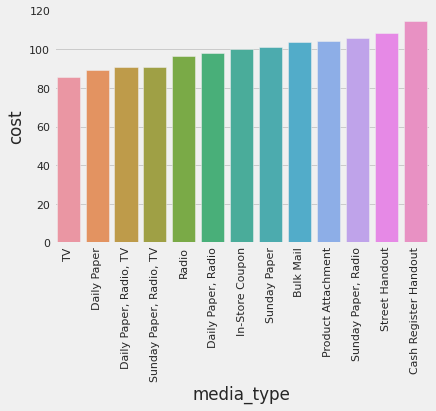

In [0]:
# plotting the last non-numeric column
pl2 = sns.barplot(data=pdf2.groupby(nonNumericCols[-1])['cost'].mean().sort_values().reset_index(), x=nonNumericCols[-1],y='cost')
pl2.tick_params(axis='x',rotation=90)

**Explanation**


After looking at the bar plots above, we can see that the mean(cost), target variable, is not much affected by the different classes of a few columns such as 'food_category', 'food_department', 'food_family', 'sales_country', 'marital_status', 'gender', 'member_card', 'occupation', 'avg_yearly_income', 'brand_name'.

The mean of cost across all the classes for these columns is pretty much very close to each other. So we can assume that these columns do not contribute much difference in predicting the cost of promotion. So, we will consider them as redundant for now but in case we don't get adequate result, we will try to include these features in the modelling.

So, we will not remove the above mentioned columns as they are considered redundant.

In [0]:
columnNames = ['food_category','food_department','food_family','sales_country','marital_status','gender','member_card','occupation','avg_yearly_income','brand_name']

columnNamesIndex = ['food_category_index','food_department_index','food_family_index','sales_country_index','marital_status_index','gender_index','member_card_index','occupation_index','avg_yearly_income_index','brand_name_index']

data = data.drop(*columnNames)
encoded_df = encoded_df.drop(*columnNamesIndex)

print(len(data.columns))
print(len(encoded_df.columns))

21
21


In [0]:
pdf=pdf.drop(columns=['food_category_index','food_department_index','food_family_index','sales_country_index','marital_status_index','gender_index','member_card_index','occupation_index','avg_yearly_income_index','brand_name_index'])

print(len(pdf.columns))

21


We have now successfully completed Exploratory Data Analysis and have selected the feature columns that will be needed for building the Machine Learning Models. Now, we will start Modelling below.

#Modeling

##Train & Test Split

In [0]:
train_data, test_data  = encoded_df.randomSplit([0.7, 0.3], 54)

print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))

Number of training records: 42290
Number of testing records : 18138


In [0]:
d = encoded_df.select('promotion_name_index').groupBy('promotion_name_index').count()
display(d)

promotion_name_index count 8.0 1755 0.0 2330 7.0 1843 29.0 1067 47.0 242 42.0 511 44.0 427 35.0 874 18.0 1480 39.0 745 1.0 2321 37.0 862 34.0 876 25.0 1150 36.0 868 41.0 532 4.0 2001 23.0 1212 45.0 402 31.0 1042 11.0 1690 21.0 1326 14.0 1555 48.0 210 22.0 1217 19.0 1374 3.0 2108 46.0 389 28.0 1075 2.0 2279 17.0 1489 38.0 799 27.0 1099 10.0 1702 30.0 1066 40.0 608 13.0 1621 33.0 910 6.0 1930 20.0 1353 32.0 972 5.0 1986 24.0 1172 15.0 1521 9.0 1741 26.0 1107 16.0 1493 12.0 1647 43.0 449

##Pipeline

In [0]:
from pyspark.ml.feature import StringIndexer, IndexToString, VectorAssembler, RFormula
from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline, Model
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 

pipeline = Pipeline(stages=[])

columns = encoded_df.columns
columns.remove('cost')

vectorAssembler_features = VectorAssembler(inputCols=columns, outputCol="features")

#specifying the maxBins = 49 because we have 49 distinct encoded values in the column promotion_name_index as shown in the previous cell, DT has maxBins = 32 unless specified which will throw an error since it has to be greater or equal to the max distinct categories in any column of the dataframe

####### DecisionTreeRegressor ##########
dt = DecisionTreeRegressor(labelCol ="cost", featuresCol ="features")
#my_stages=[vectorAssembler_features, dt]
pl_dt = [vectorAssembler_features, dt]

####### RandomForestRegressor ##########
rf = RandomForestRegressor(labelCol = "cost", featuresCol = "features")
pl_rf = [vectorAssembler_features, rf]

####### Gradient-Boosted Tree Regression #########
gbt = GBTRegressor(labelCol = "cost", featuresCol = "features")
pl_gbt = [vectorAssembler_features, gbt]


##Parameter Grid

In [0]:
# specify the param grid with params like maxBins and different values of maxDepth the models should try

from pyspark.ml.evaluation import RegressionEvaluator

pg_dt = ParamGridBuilder()\
    .baseOn({pipeline.stages: pl_dt})\
    .addGrid(dt.maxBins, [49, 52, 55])\
    .addGrid(dt.maxDepth, [5, 6, 7, 8]).build()

pg_rf = ParamGridBuilder()\
    .baseOn({pipeline.stages: pl_rf})\
    .addGrid(rf.maxBins, [49, 52, 55])\
    .addGrid(rf.maxDepth, [5, 6, 7, 8]).build()

pg_gbt = ParamGridBuilder()\
    .baseOn({pipeline.stages: pl_gbt})\
    .addGrid(gbt.maxBins, [49, 52, 55])\
    .addGrid(gbt.maxDepth, [5, 6, 7, 8]).build()



# declare evaluator for evaluating the R2 score of the model that will be trained
evaluator = RegressionEvaluator().setLabelCol('cost').setPredictionCol('prediction').setMetricName('r2')

paramGrid = pg_dt + pg_rf + pg_gbt


##Cross Validator

We are going to pass the DecisionTree, RandomForest and Gradient booster regressor models with different grid params into the cross-validator. From the results of the cross-validator, we will determine the best model for this application.

In [0]:
#crossvalidator
cv = CrossValidator()\
    .setEstimator(pipeline)\
    .setEstimatorParamMaps(paramGrid)\
    .setEvaluator(evaluator)\
    .setNumFolds(2) 

##Fit the model

In [0]:
# fit the cross validator
fittedGrid = cv.fit(train_data)

#Model Evaluation

In [0]:
import re
def paramGrid_model_name(model):
    params = [v for v in model.values() if type(v) is not list]
    name = [v[-1] for v in model.values() if type(v) is list][0]
    name = re.match(r'([a-zA-Z]*)', str(name)).groups()[0]
    #print("name:", name, " -----params: ", params)
    return "{}{}".format(name,params)

# Resulting metric and model description
# get the measure from the CrossValidator, cvModel.avgMetrics
# get the model name & params from the paramGrid
# put them together here:
kmeans_measures = zip(fittedGrid.avgMetrics, [paramGrid_model_name(m) for m in paramGrid])
metrics,model_names = zip(*kmeans_measures)

<Figure size 432x288 with 0 Axes>

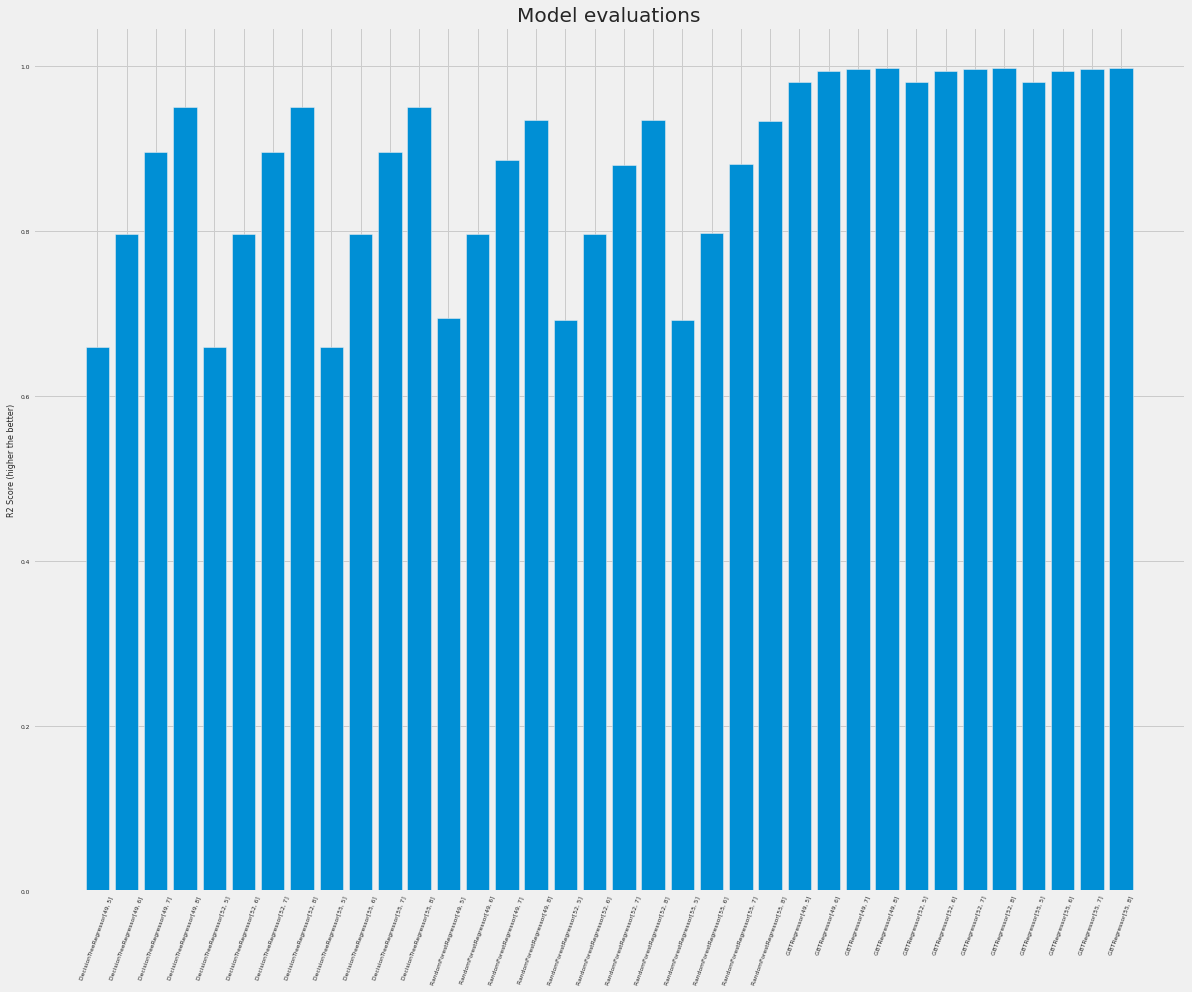

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf() # clear figure
fig = plt.figure( figsize=(20, 20))
plt.style.use('fivethirtyeight')
axis = fig.add_axes([0.1, 0.3, 0.8, 0.6])
# plot the metrics as Y
#plt.plot(range(len(model_names)),metrics)
plt.bar(range(len(model_names)),metrics)
# plot the model name & param as X labels
plt.xticks(range(len(model_names)), model_names, rotation=70, fontsize=6)
plt.yticks(fontsize=6)
#plt.xlabel('model',fontsize=8)
plt.ylabel('R2 Score (higher the better)',fontsize=8)
plt.title('Model evaluations')
display(plt.show())

In [0]:
import numpy as np

print("Best Model")
#print(models.getEstimatorParamMaps()[np.argmax(fittedGrid.avgMetrics) ])
print("Max R2 Score is: {}".format(np.max(fittedGrid.avgMetrics)))
print("")
print("Worst Model")
#print (fittedGrid.getEstimatorParamMaps()[ np.argmin(fittedGrid.avgMetrics) ])
print("Min R2 score is: {}".format(np.min(fittedGrid.avgMetrics)))

Best Model
Max R2 Score is: 0.99768941163764

Worst Model
Min R2 score is: 0.659439531115577


In [0]:
num_models = len(fittedGrid.getEstimatorParamMaps())
print(f"Executed {num_models} models")
print(f"Average model metric over the folds are: {fittedGrid.avgMetrics}")

Executed 36 models
Average model metric over the folds are: [0.659439531115577, 0.7964766890873073, 0.8957329480981089, 0.9513786765984967, 0.659439531115577, 0.7964766890873073, 0.8957329480981089, 0.9513786765984967, 0.659439531115577, 0.7964766890873073, 0.8957329480981089, 0.9513786765984966, 0.6945344989993251, 0.7972391576927323, 0.8863089085494114, 0.9355951814125043, 0.6925664877891335, 0.7970588178698963, 0.8800003574528752, 0.9345697320307037, 0.6926476302334308, 0.7975761694064261, 0.8812196101944852, 0.9333564343458882, 0.9816860279857227, 0.9949167569597464, 0.9974468166495591, 0.9975892932102355, 0.9816860279857227, 0.9949177266963709, 0.9974937803410229, 0.9976125041410702, 0.9816860279857227, 0.9949167569597464, 0.9974664177194916, 0.99768941163764]


In [0]:
fittedGrid.avgMetrics

Out[184]: [0.659439531115577,
 0.7964766890873073,
 0.8957329480981089,
 0.9513786765984967,
 0.659439531115577,
 0.7964766890873073,
 0.8957329480981089,
 0.9513786765984967,
 0.659439531115577,
 0.7964766890873073,
 0.8957329480981089,
 0.9513786765984966,
 0.6945344989993251,
 0.7972391576927323,
 0.8863089085494114,
 0.9355951814125043,
 0.6925664877891335,
 0.7970588178698963,
 0.8800003574528752,
 0.9345697320307037,
 0.6926476302334308,
 0.7975761694064261,
 0.8812196101944852,
 0.9333564343458882,
 0.9816860279857227,
 0.9949167569597464,
 0.9974468166495591,
 0.9975892932102355,
 0.9816860279857227,
 0.9949177266963709,
 0.9974937803410229,
 0.9976125041410702,
 0.9816860279857227,
 0.9949167569597464,
 0.9974664177194916,
 0.99768941163764]

In [0]:
dtBestModel = fittedGrid.bestModel

# printing the dtBestModel Characterstics
#print(dtBestModel.stages[1])
for x in range(len(dtBestModel.stages)):
    print(dtBestModel.stages[x])

VectorAssembler_d3a46f636eac
GBTRegressionModel: uid=GBTRegressor_66e518c78161, numTrees=20, numFeatures=20


##Apply Best Model

In [0]:
train_preds = dtBestModel.transform(train_data)
display(train_preds.select('cost','prediction','features'))

cost prediction features 115.18 115.25069144656878 Map(vectorType -> dense, length -> 20, values -> List(1.0, 0.0, 0.0, 0.0, 1.14, 12.8, 18.0, 15012.0, 5751.0, 1.0, 0.0, 0.0, 0.0, 8.0, 0.0, 1.0, 4.0, 18.0, 9.0, 6.0)) 134.01 134.30828899824573 Map(vectorType -> dense, length -> 20, values -> List(1.0, 0.0, 1.0, 0.0, 2.73, 14.5, 3.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 48.0, 2.0, 0.0, 4.0, 15.0, 2.0, 12.0)) 139.36 139.62729176184024 Map(vectorType -> dense, length -> 20, values -> List(1.0, 0.0, 2.0, 0.0, 0.76, 10.3, 8.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 40.0, 1.0, 0.0, 4.0, 16.0, 0.0, 10.0)) 69.24 70.38432080609137 Map(vectorType -> dense, length -> 20, values -> List(1.0, 0.0, 2.0, 0.0, 1.58, 8.3, 7.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 4.0, 15.0, 2.0, 9.0)) 94.69 94.49385045519467 Map(vectorType -> dense, length -> 20, values -> List(1.0, 0.0, 2.0, 0.0, 2.28, 10.6, 6.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 22.0, 2.0, 1.0, 4.0, 16.0, 0.0, 3.0)) 108.02 108.0163601792153 Map(vectorType -> dense, length -> 20, values -> List(1.0, 0.0, 3.0, 0.0, 1.34, 17.5, 26.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 33.0, 1.0, 0.0, 4.0, 16.0, 0.0, 11.0)) 53.23 54.10451961511482 Map(vectorType -> dense, length -> 20, values -> List(1.0, 0.0, 4.0, 0.0, 3.51, 19.3, 18.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 1.0, 4.0, 15.0, 2.0, 12.0)) 119.35 119.22003569695015 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 0.0, 0.0, 1.58, 8.3, 7.0, 15012.0, 5751.0, 1.0, 0.0, 0.0, 0.0, 16.0, 0.0, 1.0, 4.0, 18.0, 9.0, 8.0)) 95.25 95.17505092234383 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 0.0, 1.0, 2.41, 8.78, 19.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 28.0, 0.0, 1.0, 4.0, 15.0, 2.0, 7.0)) 69.42 69.42258380540777 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 0.0, 1.0, 3.12, 6.9, 13.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 27.0, 0.0, 0.0, 4.0, 15.0, 2.0, 6.0)) 96.61 96.49440023078137 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 1.0, 0.0, 0.94, 5.42, 25.0, 15012.0, 5751.0, 1.0, 0.0, 0.0, 0.0, 36.0, 0.0, 0.0, 4.0, 18.0, 9.0, 0.0)) 95.15 94.88489340602726 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 1.0, 0.0, 1.32, 15.0, 14.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 7.0, 0.0, 1.0, 4.0, 16.0, 0.0, 4.0)) 116.91 116.86396008591527 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 1.0, 1.0, 1.87, 10.0, 26.0, 15012.0, 5751.0, 1.0, 0.0, 0.0, 0.0, 5.0, 1.0, 0.0, 4.0, 18.0, 9.0, 10.0)) 138.96 137.85808219458218 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 0.0, 1.47, 10.3, 3.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 7.0, 2.0, 1.0, 4.0, 16.0, 0.0, 9.0)) 90.58 90.46247402265747 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 0.0, 2.47, 17.2, 9.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 45.0, 3.0, 1.0, 4.0, 16.0, 0.0, 3.0)) 101.75 102.17866833824951 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 0.0, 2.58, 11.6, 14.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 38.0, 4.0, 0.0, 4.0, 15.0, 2.0, 1.0)) 136.43 135.42904840558822 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 0.0, 2.74, 17.2, 13.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 31.0, 2.0, 0.0, 4.0, 15.0, 2.0, 9.0)) 115.85 115.94052285780674 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 0.0, 2.86, 16.8, 33.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 32.0, 1.0, 1.0, 4.0, 15.0, 2.0, 0.0)) 120.09 119.61167902492066 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 0.0, 3.29, 6.85, 5.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 48.0, 0.0, 0.0, 4.0, 16.0, 0.0, 2.0)) 61.27 61.267392121697895 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 0.0, 3.88, 17.0, 11.0, 15012.0, 5751.0, 1.0, 0.0, 0.0, 0.0, 13.0, 2.0, 1.0, 4.0, 18.0, 9.0, 9.0)) 108.27 108.53443335308951 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 1.0, 1.88, 18.8, 25.0, 15012.0, 5751.0, 1.0, 0.0, 

In [0]:
test_preds = dtBestModel.transform(test_data)
display(test_preds.select('cost','prediction','features'))

cost prediction features 108.02 108.28018962053194 Map(vectorType -> dense, length -> 20, values -> List(1.0, 0.0, 1.0, 0.0, 1.79, 6.89, 7.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 33.0, 0.0, 1.0, 4.0, 16.0, 0.0, 11.0)) 110.52 110.0240656604837 Map(vectorType -> dense, length -> 20, values -> List(1.0, 0.0, 3.0, 0.0, 2.75, 6.02, 32.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 21.0, 4.0, 1.0, 4.0, 16.0, 0.0, 3.0)) 110.52 110.0240656604837 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 0.0, 0.0, 3.87, 6.55, 29.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 21.0, 0.0, 1.0, 4.0, 16.0, 0.0, 3.0)) 73.92 73.53207044630102 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 1.0, 0.0, 1.25, 8.39, 31.0, 15012.0, 5751.0, 1.0, 0.0, 0.0, 0.0, 21.0, 0.0, 1.0, 4.0, 18.0, 9.0, 1.0)) 109.03 108.83998688497762 Map(vectorType -> sparse, length -> 20, indices -> List(0, 1, 2, 4, 5, 6, 7, 8, 9, 13, 16, 17), values -> List(1.0, 1.0, 1.0, 1.87, 14.7, 10.0, 22271.0, 3561.0, 1.0, 23.0, 4.0, 16.0)) 108.02 108.0163601792153 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 1.0, 0.0, 3.52, 19.3, 8.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 33.0, 2.0, 0.0, 4.0, 16.0, 0.0, 11.0)) 134.01 134.30828899824573 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 0.0, 0.61, 7.39, 14.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 48.0, 3.0, 1.0, 4.0, 15.0, 2.0, 12.0)) 79.33 79.80056733712205 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 1.0, 2.43, 17.7, 21.0, 15012.0, 5751.0, 1.0, 0.0, 0.0, 0.0, 21.0, 2.0, 0.0, 4.0, 18.0, 9.0, 11.0)) 108.27 108.53443335308951 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 2.0, 1.0, 2.45, 17.2, 16.0, 15012.0, 5751.0, 1.0, 0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 4.0, 18.0, 9.0, 3.0)) 110.52 109.76023621916706 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 3.0, 0.0, 1.71, 15.1, 21.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 21.0, 2.0, 0.0, 4.0, 16.0, 0.0, 3.0)) 133.99 134.41092910905496 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 3.0, 0.0, 1.79, 6.89, 7.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 27.0, 2.0, 1.0, 4.0, 15.0, 2.0, 5.0)) 133.99 134.41092910905496 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 3.0, 0.0, 2.49, 9.5, 26.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 27.0, 2.0, 1.0, 4.0, 15.0, 2.0, 5.0)) 133.99 134.41092910905496 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 3.0, 0.0, 2.59, 12.3, 18.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 27.0, 2.0, 1.0, 4.0, 15.0, 2.0, 5.0)) 76.05 74.76666754412824 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 3.0, 0.0, 3.44, 16.5, 26.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 29.0, 1.0, 0.0, 4.0, 15.0, 2.0, 11.0)) 139.36 139.62729176184024 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 3.0, 1.0, 0.64, 6.64, 34.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 40.0, 2.0, 0.0, 4.0, 16.0, 0.0, 10.0)) 95.25 95.17505092234383 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 4.0, 0.0, 1.78, 10.0, 17.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 28.0, 1.0, 1.0, 4.0, 15.0, 2.0, 7.0)) 90.58 90.46247402265747 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 4.0, 0.0, 2.17, 7.8, 29.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 45.0, 2.0, 0.0, 4.0, 16.0, 0.0, 3.0)) 132.9 130.83075509288284 Map(vectorType -> dense, length -> 20, values -> List(1.0, 1.0, 4.0, 1.0, 3.75, 16.2, 30.0, 22271.0, 3561.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 4.0, 16.0, 0.0, 2.0)) 101.65 101.46549411751215 Map(vectorType -> dense, length -> 20, values -> List(1.0, 2.0, 0.0, 0.0, 0.84, 10.1, 18.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 25.0, 0.0, 1.0, 4.0, 15.0, 2.0, 7.0)) 69.24 70.38432080609137 Map(vectorType -> dense, length -> 20, values -> List(1.0, 2.0, 0.0, 2.0, 0.89, 10.8, 22.0, 15321.0, 4294.0, 1.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 4.0, 15.0, 2.0, 9.0)) 69.42 69.42258380540777 Map(vectorType -> dense, length -> 20, values -> List(1.0, 2.0, 1.0, 0.0, 1.85, 9.89, 10.0, 

##Visualization (Model Results)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


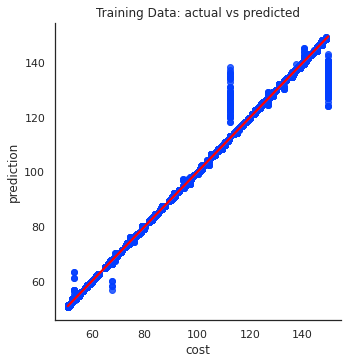

In [0]:
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette("bright")

train_preds_df = train_preds.toPandas()

sns.lmplot(data=train_preds_df, x='cost', y='prediction', line_kws={'color': 'red'}, height=5, aspect=1).set(title='Training Data: actual vs predicted');

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


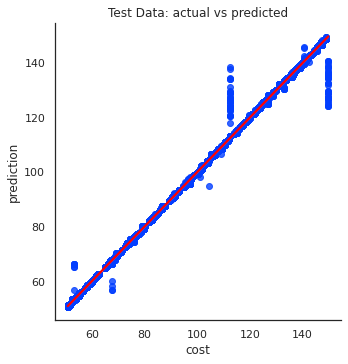

In [0]:
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette("bright")

test_preds_df = test_preds.toPandas()

sns.lmplot(data=test_preds_df, x='cost', y='prediction', line_kws={'color': 'red'}, height=5, aspect=1).set(title='Test Data: actual vs predicted');

In [0]:
# display the original value of cost and the predicted values of the cost with the Best Model trained.
display(test_preds.select('cost','prediction'))

cost prediction 108.02 108.28018962053194 110.52 110.0240656604837 110.52 110.0240656604837 73.92 73.53207044630102 109.03 108.83998688497762 108.02 108.0163601792153 134.01 134.30828899824573 79.33 79.80056733712205 108.27 108.53443335308951 110.52 109.76023621916706 133.99 134.41092910905496 133.99 134.41092910905496 133.99 134.41092910905496 76.05 74.76666754412824 139.36 139.62729176184024 95.25 95.17505092234383 90.58 90.46247402265747 132.9 130.83075509288284 101.65 101.46549411751215 69.24 70.38432080609137 69.42 69.42258380540777 52.42 53.374407740777436 90.58 90.46247402265747 74.5 75.47996665894102 108.02 108.0163601792153 108.02 108.0163601792153 79.13 80.33747054451823 90.58 90.46247402265747 124.3 124.67973318792428 123.79 123.54687712836483 67.51 58.294300638962525 73.02 73.43125191827717 115.18 115.25173296779833 57.51 57.60293255788381 95.25 95.17505092234383 110.5 110.3336950183309 110.52 110.27387230475658 105.26 106.40015088634087 108.02 108.4646839225082 67.51 57.024808931852924 101.65 101.46549411751215 123.72 123.32023758912709 110.5 110.3336950183309 95.25 95.17505092234383 95.25 95.17505092234383 104.3 104.10385045519465 119.62 119.78046949780203 61.27 61.267392121697895 123.79 123.63762322679777 96.61 96.49544175201092 101.65 101.46549411751215 123.79 123.63762322679777 96.61 96.49544175201092 129.64 129.74378069637712 77.7 77.27207841992382 136.43 135.42904840558822 120.67 121.05505605667369 146.32 146.45883548633455 74.5 74.99288713639505 114.98 114.251071238678 119.55 120.69385936783009 109.03 109.3823757673998 124.56 124.45690429989186 84.97 85.04884378344813 67.2 67.20466843122516 66.37 66.44501520029559 56.49 56.44745784475381 129.2 129.1591824705445 123.61 123.51117147432508 106.1 106.02315676576345 146.72 146.7208668834584 108.22 108.46093640504444 138.81 138.88071329997942 55.59 55.563487982317184 126.62 126.69969189099947 111.7 111.67821288663148 145.41 144.9469879457713 53.01 53.02444252836706 123.63 123.69778395743519 137.47 137.4752549389857 146.72 146.7208668834584 62.71 62.82713639028743 76.98 77.1355573324028 98.81 98.96006089354329 50.79 50.83167951360684 123.79 123.63762322679777 85.88 86.01620734074913 133.6 133.7568452745841 137.46 137.51124337971072 145.41 144.9469879457713 123.61 123.51117147432508 137.47 137.4752549389857 65.7 65.67208404660431 131.62 131.7715189219056 123.61 123.51117147432508 86.79 87.0545527671249 97.13 96.99001194169854 140.19 140.17071683987507 68.97 68.94599652346758 131.75 131.98921869927432 98.81 98.96006089354329 99.38 99.41961633888354 124.36 124.5647235578226 79.59 79.69994974725694 98.81 98.96006089354329 140.9 140.85521896005525 126.24 126.24925117462755 139.36 139.6272917618403 109.93 109.9380798850913 114.01 113.94714747780782 67.2 67.20466843122516 62.74 62.66696873008738 131.81 131.70561792806208 138.53 138.17052664849214 77.72 77.73501451367754 55.45 55.456921872636805 59.86 59.87599415581759 100.44 99.46154005549471 105.19 105.6983571934334 115.05 114.96763136099099 85.88 86.01620734074913 75.22 74.97332978058213 87.07 87.11367622042928 91.58 91.37600915754078 137.46 137.51124337971072 95.98 95.69343171734488 97.13 96.99001194169854 123.02 123.09217574409071 131.2 132.04744217011805 133.6 133.7568452745841 69.54 69.82442190176671 95.78 95.87021325995381 75.76 75.74383694330791 116.74 116.64857542042185 53.21 53.286194781369645 123.02 123.09217574409071 81.79 81.86037613632202 58.27 58.18720793551337 53.29 53.340192664868034 59.4 59.55235298333485 146.72 146.7208668834584 137.46 137.51124337971072 62.67 62.72885837395016 144.31 144.20064574757242 149.75 139.43975718399327 68.63 68.69778395743519 107.2 107.20590464571073 122.51 122.7464596014209 87.07 87.11367622042928 77.24 77.23948843916436 50.79 50.83167951360684 51.47 51.60492769698129 52.77 52.745391805424305 67.63 67.8433495946393 147.18 146.9028438717866 53.82 53.716488286175604 69.63 69.60949332007795 50.79 50.83167951360684 76.98 77.1355573324028 129.2 129.1591824705445 67.31 67.05359632

Output can only be rendered in Databricks

##Model Evaluation Metrics

In [0]:
eval = RegressionEvaluator(labelCol = "cost", )
rmse = eval.evaluate(test_preds)
mse= eval.evaluate(test_preds, {eval.metricName: "mse"})
mae= eval.evaluate(test_preds, {eval.metricName: "mae"})
r2 = eval.evaluate(test_preds, {eval.metricName: "r2"})

print("RMSE     : %3f" %rmse)
print("MSE      : %3f" %mse)
print("MAE      : %3f" %mae)
print("R2 score : %3f" %r2)

RMSE     : 1.186288
MSE      : 1.407279
MAE      : 0.228851
R2 score : 0.998437


From the above table, we can see that the best model is Gradient Boost Regressor has predicted the cost variable. We can concur that most of the predicted values are very closer to the original values hence the model having an R2 Score of around 0.998437 and RMSE value of 1.186288 on the test data.

This is a very good model which can give better insight on what the cost of promoting an item or a product at the store can be.

#Conclusion

* The Gradient Boost Regressor is a good model with an R2 score of 0.998437 which can predict the promotion cost of a product pretty accurately.
  * **RMSE     : 1.186288**
  * MSE      : 1.407279
  * MAE      : 0.228851
  * **R2 score : 0.998437**
* It can almost predict the cost pretty accurately (value is very near to original) almost 99% of the time.
* Only a few product's promotion cost is incorrectly predicted for which the actual results might vary.

## Improvement opportunities
* Can use Deep Learning models to predict the cost.
* Can build a pyspark app to take inputs which would use the model to calculate and display predicted cost.